# Predicting Water Pump Functionality in Tanzanian Water Wells.

![Google Logo](https://www.embracerelief.org/wp-content/uploads/2020/05/drinking-water-well-1024x683.jpg)

## 1. Business Understanding

This business problem addresses a critical issue in Tanzania: the provision of clean, functional water points to its citizens. Many of the existing water pumps are either in a state of disrepair or have completely failed, creating a significant challenge for public health and development.

The core objective of this project is to build a machine learning classification model to predict the functional status of these water pumps. This predictive model will categorize each well into one of three distinct classes:

* **Functional:** The well is in working order.
* **Non-functional:** The well is completely broken and requires significant intervention.
* **Functional but needs repair:** The well is currently working but shows signs of impending failure and requires immediate maintenance to prevent it from becoming non-functional.

By accurately identifying the status of each water pump, this project aims to provide a tool that can help guide resources, streamline maintenance efforts, and ultimately improve access to clean water.

### Stakeholders

This project has several key stakeholders who would benefit from the successful implementation of this model:

* **Tanzanian Ministry of Water:** As the primary government body responsible for water infrastructure, they would use the model's predictions to plan and prioritize maintenance and repair missions, ensuring resources are allocated efficiently to the areas most in need.
* **Non-Governmental Organizations (NGOs):** Organizations dedicated to development and clean water initiatives can use this model to make data-driven decisions on where to focus their efforts and funding for water well projects.
* **Local Communities and Citizens:** The direct beneficiaries of this project, who rely on the water pumps for daily life. An accurate predictive model leads to more reliable access to clean water.
* **Field Technicians and Engineers:** The on-the-ground teams responsible for repairing the water pumps. The model's output would help them with logistical planning by identifying wells that require a specific type of intervention (repair vs. full replacement). 

**Data**: The data for this project originates from a currently active competition on the Data Driven website. The dataset comprises over 59,000 records of water wells in Tanzania. Each record contains information on the well location, technical specifications of the well, and details about the water. A list of the features and their descriptions, as provided on the website, is included for reference. The data can be obtained from the following link: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/    

## 2. Data Understanding

Column Descriptions: 
- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint


In [177]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import loguniform

#Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE,SMOTEN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import label_binarize

In [2]:
# Load the datasets

train_df = pd.read_csv('data/train.csv')
train_status = pd.read_csv('data/status.csv')
test_features = pd.read_csv('data/test.csv')

# Merge the training data
#train_df = pd.merge(train_features, train_status, on='id')

# Display initial information
print("\nInitial DataFrame Info:")
train_df.info()
print("\nInitial DataFrame Head:")
train_df.head()


Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
train_status.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [4]:
print("\nInitial DataFrame Tail:")
train_df.tail()


Initial DataFrame Tail:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
train_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Columns: 40 entries, id to waterpoint_type_group
dtypes: float64(3), int64(7), object(30)
memory usage: 18.1+ MB


The dataset contains 59400 rows and 41 columns. 3 of the columns are floats, 7 are integers and 30 are objects.

In [6]:
#concise summary statistics

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [7]:
#Check the dataset shape
train_df.shape
print(f" The dataset has {train_df.shape[0]} records and {train_df.shape[1]} columns")

 The dataset has 59400 records and 40 columns


In [8]:
#Describe categorical features
train_df.describe(include="O").T

,count,unique,top,freq
date_recorded,59400,356,2011-03-15,572
funder,55765,1897,Government Of Tanzania,9084
installer,55745,2145,DWE,17402
wpt_name,59400,37400,none,3563
basin,59400,9,Lake Victoria,10248
subvillage,59029,19287,Madukani,508
region,59400,21,Iringa,5294
lga,59400,125,Njombe,2503
ward,59400,2092,Igosi,307
public_meeting,56066,2,True,51011


In [9]:
#Create a dataframe copy to be used in data cleaning using copy() method
train_df1 = train_df.copy(deep=True)
train_df1[:3]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [10]:
test_df1 = test_features.copy(deep = True)
test_df1[:3]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other


In [11]:
# check for unique values in each column 
for coln in train_df1:
    coln_val = train_df1[coln].unique()
    print(f" {coln},'\n', {coln_val}", "\n")

 id,'
', [69572  8776 34310 ... 37057 31282 26348] 

 amount_tsh,'
', [6.00e+03 0.00e+00 2.50e+01 2.00e+01 2.00e+02 5.00e+02 5.00e+01 4.00e+03
 1.50e+03 6.00e+00 2.50e+02 1.00e+01 1.00e+03 1.00e+02 3.00e+01 2.00e+03
 4.00e+02 1.20e+03 4.00e+01 3.00e+02 2.50e+04 7.50e+02 5.00e+03 6.00e+02
 7.20e+03 2.40e+03 5.00e+00 3.60e+03 4.50e+02 4.00e+04 1.20e+04 3.00e+03
 7.00e+00 2.00e+04 2.80e+03 2.20e+03 7.00e+01 5.50e+03 1.00e+04 2.50e+03
 6.50e+03 5.50e+02 3.30e+01 8.00e+03 4.70e+03 7.00e+03 1.40e+04 1.30e+03
 1.00e+05 7.00e+02 1.00e+00 6.00e+01 3.50e+02 2.00e-01 3.50e+01 3.06e+02
 8.50e+03 1.17e+05 3.50e+03 5.20e+02 1.50e+01 6.30e+03 9.00e+03 1.50e+02
 1.20e+05 1.38e+05 3.50e+05 4.50e+03 1.30e+04 4.50e+04 2.00e+00 1.50e+04
 1.10e+04 5.00e+04 7.50e+03 1.63e+04 8.00e+02 1.60e+04 3.00e+04 5.30e+01
 5.40e+03 7.00e+04 2.50e+05 2.00e+05 2.60e+04 1.80e+04 2.60e+01 5.90e+02
 9.00e+02 9.00e+00 1.40e+03 1.70e+05 2.20e+02 3.80e+04 2.50e-01 1.20e+01
 6.00e+04 5.90e+01] 

 date_recorded,'
', ['2011-03-14

 quality_group,'
', ['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored'] 

 quantity,'
', ['enough' 'insufficient' 'dry' 'seasonal' 'unknown'] 

 quantity_group,'
', ['enough' 'insufficient' 'dry' 'seasonal' 'unknown'] 

 source,'
', ['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown'] 

 source_type,'
', ['spring' 'rainwater harvesting' 'dam' 'borehole' 'other' 'shallow well'
 'river/lake'] 

 source_class,'
', ['groundwater' 'surface' 'unknown'] 

 waterpoint_type,'
', ['communal standpipe' 'communal standpipe multiple' 'hand pump' 'other'
 'improved spring' 'cattle trough' 'dam'] 

 waterpoint_type_group,'
', ['communal standpipe' 'hand pump' 'other' 'improved spring'
 'cattle trough' 'dam'] 



In [12]:
for coln in test_df1:
    coln_val = test_df1[coln].unique()
    print(f" {coln},'\n', {coln_val}", "\n")

 id,'
', [50785 51630 17168 ... 28749 33492 68707] 

 amount_tsh,'
', [0.00e+00 5.00e+02 3.00e+01 5.00e+00 1.00e+03 1.20e+03 2.00e+02 2.00e+01
 5.00e+01 1.50e+03 2.40e+03 7.00e+00 7.50e+03 2.00e+03 3.00e+02 1.00e+02
 1.00e+01 2.50e+02 4.00e+03 3.00e+03 2.50e+03 2.50e+01 6.00e+00 4.00e+01
 7.50e+02 4.00e+02 6.00e+02 5.00e+03 1.50e+02 6.00e+03 3.30e+01 1.80e+04
 2.20e+03 1.20e+04 3.60e+03 8.00e+03 7.00e+02 4.70e+03 4.50e+02 6.00e+01
 1.00e+04 1.50e+01 2.00e+04 6.50e+03 7.00e+01 3.00e+04 2.50e+04 3.50e+04
 1.50e+04 2.00e+05 1.00e+05 7.00e+04 2.00e-01 1.40e+04 7.20e+03 3.50e+03
 2.00e+00 4.00e+04 3.50e+02 3.50e+01 7.00e+03 3.00e+00 2.55e+03 5.00e+04
 6.00e+04 5.00e-01 5.50e+02 2.80e+03] 

 date_recorded,'
', ['2013-02-04' '2013-02-01' '2013-01-22' '2013-03-27' '2013-03-04'
 '2011-03-02' '2013-01-25' '2013-01-23' '2013-03-18' '2013-10-03'
 '2013-02-27' '2012-10-11' '2011-07-29' '2013-06-03' '2011-02-24'
 '2011-03-11' '2012-10-06' '2013-02-02' '2013-03-12' '2011-03-07'
 '2013-02-09' '2012-10

## 3. Data Cleaning

The factors that affect pump functionality can be grouped into the categories below:
1. Pump and Well Infrastructure
2. Socio-Economic and Management Factors
3. Geographical and Environmental Factors

In [13]:
train_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [14]:
test_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [15]:
train_df1.date_recorded.value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2013-01-01      1
2011-09-16      1
2011-09-09      1
2011-09-20      1
2013-12-01      1
Name: date_recorded, Length: 356, dtype: int64

In [16]:
test_df1.date_recorded.value_counts()

2013-02-03    138
2011-03-16    137
2011-03-17    137
2011-03-18    130
2011-03-14    129
             ... 
2011-09-24      1
2004-02-01      1
2011-09-02      1
2013-01-06      1
2004-01-09      1
Name: date_recorded, Length: 331, dtype: int64

In [17]:
train_df1.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

#### Null Values

In [18]:
train_df1.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [19]:
test_df1.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

#### Duplicates

In [20]:
# train
train_duplicates = train_df1.duplicated()
print( f'There are {train_duplicates.sum()} duplicates in the Train data')

#test
test_duplicates = test_df1.duplicated()
test_duplicates.sum()
print( f'There are {test_duplicates.sum()} duplicates in the Test data')

#train_status
train_status_duplicates = train_status.duplicated()
train_status_duplicates.sum()
print( f'There are {train_status_duplicates.sum()} duplicates in the Train_status data')

There are 0 duplicates in the Train data
There are 0 duplicates in the Test data
There are 0 duplicates in the Train_status data


There are no duplicates on all the datasets.

#### Date time Format

In [21]:
#train 
train_df1['date_recorded'] = pd.to_datetime(train_df1['date_recorded'], errors = 'coerce')
train_df1['date_recorded'] = train_df1['date_recorded'].dt.year
train_df1.date_recorded.value_counts()


2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: date_recorded, dtype: int64

In [22]:
#test 
test_df1['date_recorded'] = pd.to_datetime(test_df1['date_recorded'], errors = 'coerce')
test_df1['date_recorded'] = test_df1['date_recorded'].dt.year
test_features.date_recorded.value_counts()

2013-02-03    138
2011-03-16    137
2011-03-17    137
2011-03-18    130
2011-03-14    129
             ... 
2011-09-24      1
2004-02-01      1
2011-09-02      1
2013-01-06      1
2004-01-09      1
Name: date_recorded, Length: 331, dtype: int64

#### Filling Null Values

In [23]:
train_df1.funder.value_counts(dropna=False, normalize = True)


Government Of Tanzania    0.152929
NaN                       0.061195
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
                            ...   
Kidika                    0.000017
Vn                        0.000017
Meru Concrete             0.000017
Vgovernment               0.000017
Brad                      0.000017
Name: funder, Length: 1898, dtype: float64

In [24]:
test_df1.funder.value_counts(dropna=False, normalize=True)


Government Of Tanzania    0.149158
NaN                       0.058519
Danida                    0.053401
Hesawa                    0.039057
World Bank                0.023704
                            ...   
Water /sema               0.000067
Nicodemu Mkumbw           0.000067
Kijiji                    0.000067
Bened                     0.000067
Mapinga Prima             0.000067
Name: funder, Length: 981, dtype: float64

In [25]:
train_df1.funder.fillna('Unknown', inplace=True)

In [26]:
test_df1.funder.fillna('Unknown', inplace=True)

In [27]:
train_df1.funder.value_counts(dropna=False, normalize=True)

Government Of Tanzania    0.152929
Unknown                   0.061263
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
                            ...   
Hilfe Fur Brunder         0.000017
Gurdians                  0.000017
Yaole                     0.000017
Kwa Mzee Waziri           0.000017
Esawa                     0.000017
Name: funder, Length: 1897, dtype: float64

In [28]:
test_df1.funder.value_counts(dropna=False, normalize=True)

Government Of Tanzania    0.149158
Unknown                   0.058586
Danida                    0.053401
Hesawa                    0.039057
World Bank                0.023704
                            ...   
Krf                       0.000067
Village Govt              0.000067
Dak                       0.000067
Tambalizeni               0.000067
Mapinga Prima             0.000067
Name: funder, Length: 980, dtype: float64

In [29]:
train_df1.installer .value_counts(dropna=False, normalize = True)

DWE             0.292963
NaN             0.061532
Government      0.030724
RWE             0.020303
Commu           0.017845
                  ...   
Elius Chacha    0.000017
A.D.B           0.000017
Arisan          0.000017
Norani          0.000017
WOYEGE          0.000017
Name: installer, Length: 2146, dtype: float64

In [30]:
#Filling the Null values for installer

train_df1.installer.fillna('Unknown', inplace=True)
test_df1.installer.fillna('Unknown', inplace=True)
train_df1.installer .value_counts(dropna=False, normalize = True)

DWE                        0.292963
Unknown                    0.061582
Government                 0.030724
RWE                        0.020303
Commu                      0.017845
                             ...   
GDP                        0.000017
DBSP                       0.000017
Word bank                  0.000017
Region Water Department    0.000017
WOYEGE                     0.000017
Name: installer, Length: 2145, dtype: float64

In [31]:
test_df1.installer .value_counts(dropna=False, normalize = True)

DWE                        0.292862
Unknown                    0.059125
Government                 0.030774
RWE                        0.019663
Commu                      0.019327
                             ...   
Mwika Lekura Water User    0.000067
DESK                       0.000067
FARM                       0.000067
DALDO                      0.000067
TWESA/ Community           0.000067
Name: installer, Length: 1091, dtype: float64

In [32]:
#Filling Null values for Scheme Management
train_df1.scheme_management.fillna('Unknown', inplace=True)
test_df1.scheme_management.fillna('Unknown', inplace=True)

In [33]:
#Filling Null values for Public Meeting
train_df1.public_meeting.fillna('Unknown', inplace=True)
test_df1.public_meeting.fillna('Unknown', inplace=True)

In [34]:
#Filling Null values for SubVillage
train_df1.subvillage.fillna('Unknown', inplace=True)
test_df1.subvillage.fillna('Unknown', inplace=True)

In [35]:
#Filling Null values for permit
train_df1.permit.fillna('Unknown', inplace=True)
test_df1.permit.fillna('Unknown', inplace=True)

In [36]:
train_df1.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

The Scheme name has 28,166 null values and it would not be adviasble to fill these with 'uknown' therefore the Scheme name column will be dropped.

In [37]:
#dropping scheme_name
train_df1.drop('scheme_name', axis = 1, inplace = True) 
test_df1.drop('scheme_name', axis = 1, inplace = True) 

In [38]:
train_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [39]:
test_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [40]:
train_df1.population.value_counts(dropna=False, normalize=True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64

It is possible to have an area around a well with no people, therefore the poulation zero values will be left.

#### Geographic Location and Environmental Columns

In [41]:
#The columns are region, region_code, district_code, lga,subvillage,longitude,latitude,basin, gps_height and ward.
train_df1['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

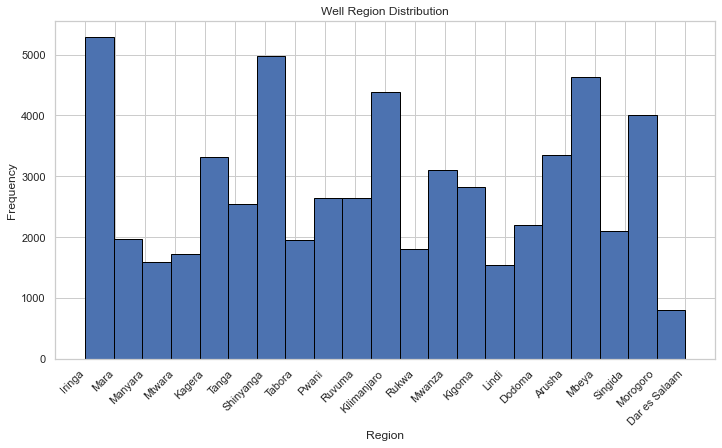

In [42]:
#Create a histogram of the 'Region' column
plt.figure(figsize=(10, 6))
plt.hist(train_df1['region'], bins= 21, edgecolor='black')
plt.xticks(rotation= 45, ha='right')
plt.tight_layout()
plt.title('Well Region Distribution')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

In [43]:
max_reg = train_df1['region'].value_counts().idxmax()
print(f'The region with the highest number of wells present is {max_reg}')

The region with the highest number of wells present is Iringa


In [44]:
train_df1['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [45]:
train_df1['district_code'].value_counts()
#district_code, lga,subvillage,longitude,latitude,basin, gps_height and ward

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [46]:
train_df1['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

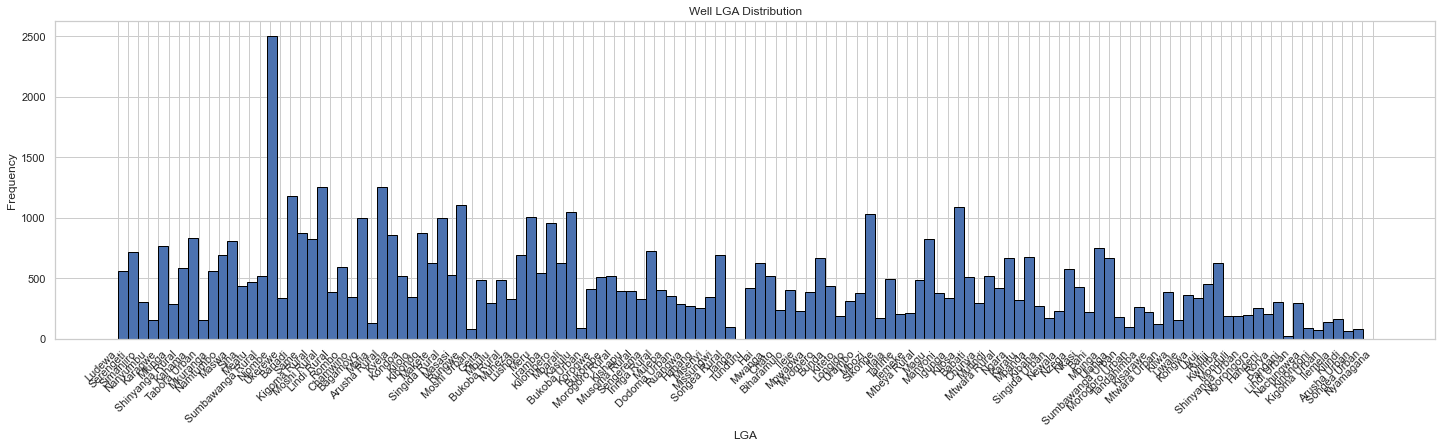

In [47]:
plt.figure(figsize=(20, 6))
plt.hist(train_df1['lga'], bins= 126, edgecolor='black')
plt.xticks(rotation= 45, ha='right')
plt.tight_layout()
plt.title('Well LGA Distribution')
plt.xlabel('LGA')
plt.ylabel('Frequency')
plt.show()

In [48]:
max_lag = train_df1['lga'].value_counts().idxmax()
print(f'The lga with the highest number of wells present is {max_lag}')

The lga with the highest number of wells present is Njombe


In [49]:
train_df1['subvillage'].value_counts()

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Unknown           371
                 ... 
Bubala              1
Maswina             1
Mfunte              1
Mwamakwale          1
Juhudi Bwawani      1
Name: subvillage, Length: 19288, dtype: int64

In [50]:
train_df1['longitude'].value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [51]:
train_df1['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [52]:
train_df1['ward'].value_counts()

Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
                ... 
Igogo              1
Kihangimahuka      1
Kirongo            1
Linda              1
Rasbura            1
Name: ward, Length: 2092, dtype: int64

In [53]:
train_df1['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [54]:
max_bas = train_df1['basin'].value_counts().idxmax()
print(f'The Water basin with the highest number of wells present is {max_bas}')

The Water basin with the highest number of wells present is Lake Victoria


In [55]:
train_df1['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

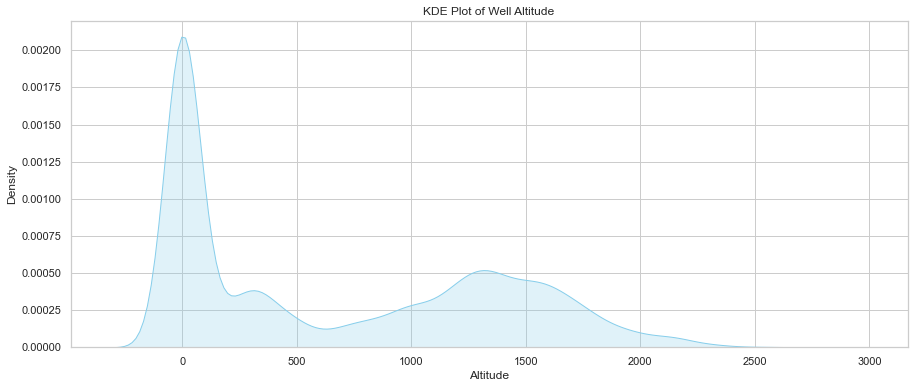

In [56]:
plt.figure(figsize=(15, 6))
sns.kdeplot(data=train_df1, x='gps_height', fill=True, color='skyblue')
plt.title('KDE Plot of Well Altitude')
plt.xlabel('Altitude')
plt.ylabel('Density')
plt.show()

In [57]:
max_alt = train_df1['gps_height'].value_counts().idxmax()
print(f'The Altitude at which most wells are found is {max_alt} meters above sea level')

The Altitude at which most wells are found is 0 meters above sea level


In [58]:
train_df1['wpt_name'].value_counts()

none                     3563
Shuleni                  1748
Zahanati                  830
Msikitini                 535
Kanisani                  323
                         ... 
Kwa Bibi Shamba             1
Mgodi                       1
Kwa Chiyanga                1
Kasulo Primary School       1
N/Secondary                 1
Name: wpt_name, Length: 37400, dtype: int64

In [59]:
train_df1['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [60]:
train_df1.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

#### Pump and Well Infrastructure Columns

In [61]:
# Waterpoint
train_df1['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [62]:
train_df1['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

Waterpoint type group and Waterpoint type group seem to have similar value counts with the only difference being that waterpoint_type has 2 groups of communal standpipe ie. single and multiple communal standpipes.

In [63]:
#Extraction
train_df1['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [64]:
train_df1['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [65]:
train_df1['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

The extraction columns contain similar values. For ease of identification of the 'best' extraction method, the column to me kept is extraction_type_class.

In [66]:
#The columns are Construction year, Total Static Head(amount_tsh), , 'water_quality',
#'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
#'source_class', 'waterpoint_type', 'waterpoint_type_group'


In [67]:
# water quality
train_df1['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [68]:
train_df1['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [69]:
# water quantity
train_df1['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [70]:
train_df1['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [71]:
#water source
train_df1['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [72]:
train_df1['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [73]:
train_df1['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [74]:
#Total static head
train_df1['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [75]:
#construction year
train_df1['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

#### Social , Economic and Management Factors

In [76]:
#The columns are 'payment', 'payment_type', management','management_group'scheme_management', 
#'funder','population', 'public_meeting' and Installer.


In [77]:
train_df1['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [78]:
train_df1['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [79]:
train_df1['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [80]:
train_df1['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [81]:
train_df1['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [82]:
train_df1['funder'].value_counts()

Government Of Tanzania    9084
Unknown                   3639
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Hilfe Fur Brunder            1
Gurdians                     1
Yaole                        1
Kwa Mzee Waziri              1
Esawa                        1
Name: funder, Length: 1897, dtype: int64

In [83]:
train_df1['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [84]:
train_df1['public_meeting'].value_counts()

True       51011
False       5055
Unknown     3334
Name: public_meeting, dtype: int64

In [85]:
train_df1['installer'].value_counts()

DWE                        17402
Unknown                     3658
Government                  1825
RWE                         1206
Commu                       1060
                           ...  
GDP                            1
DBSP                           1
Word bank                      1
Region Water Department        1
WOYEGE                         1
Name: installer, Length: 2145, dtype: int64

In [86]:
train_df1.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

#### Dropping irrelevant and duplicated columns

In [87]:
train_df1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011,Unknown,0,Unknown,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [88]:
#Train
train_df2 = train_df1.drop(columns=['quantity_group','extraction_type_group', 'extraction_type_class',
                                    'quality_group','source_type','waterpoint_type_group', 'funder',
                                    'recorded_by', 'wpt_name', 'num_private','waterpoint_type_group',
                                    'management','ward', 'payment' ] ,axis = 1)
#Test
test_df2 = test_df1.drop(columns=['quantity_group','extraction_type_group', 'extraction_type_class',
                                    'quality_group','source_type','waterpoint_type_group', 'funder',
                                    'recorded_by', 'wpt_name', 'num_private','waterpoint_type_group',
                                    'management','ward', 'payment' ] ,axis = 1)


In [89]:
train_df2

,id,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,basin,subvillage,region,...,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type
0,69572,6000.0,2011,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,...,False,1999,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe
1,8776,0.0,2013,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,...,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,34310,25.0,2013,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,...,True,2009,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple
3,67743,0.0,2013,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,True,1986,submersible,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
4,19728,0.0,2011,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,...,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013,1210,CES,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,...,True,1999,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe
59396,27263,4700.0,2011,1212,Cefa,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,...,True,1996,gravity,user-group,annually,soft,enough,river,surface,communal standpipe
59397,37057,0.0,2011,0,Unknown,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,...,False,0,swn 80,user-group,monthly,fluoride,enough,machine dbh,groundwater,hand pump
59398,31282,0.0,2011,0,Musa,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,...,True,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump


In [90]:
test_df2

,id,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,basin,subvillage,region,...,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type
0,50785,0.0,2013,1996,DMDD,35.290799,-4.059696,Internal,Magoma,Manyara,...,True,2012,other,parastatal,never pay,soft,seasonal,rainwater harvesting,surface,other
1,51630,0.0,2013,1569,DWE,36.656709,-3.309214,Pangani,Kimnyak,Arusha,...,True,2000,gravity,user-group,never pay,soft,insufficient,spring,groundwater,communal standpipe
2,17168,0.0,2013,1567,Unknown,34.767863,-5.004344,Internal,Msatu,Singida,...,Unknown,2010,other,user-group,never pay,soft,insufficient,rainwater harvesting,surface,other
3,45559,0.0,2013,267,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,Kipindimbi,Lindi,...,True,1987,other,user-group,unknown,soft,dry,shallow well,groundwater,other
4,49871,500.0,2013,1260,BRUDER,35.006123,-10.950412,Ruvuma / Southern Coast,Losonga,Ruvuma,...,True,2000,gravity,user-group,monthly,soft,enough,spring,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011,34,Da,38.852669,-6.582841,Wami / Ruvu,Yombo,Pwani,...,True,1988,mono,user-group,never pay,soft,enough,river,surface,communal standpipe
14846,18990,1000.0,2011,0,HIAP,37.451633,-5.350428,Pangani,Mkondoa,Tanga,...,False,1994,nira/tanira,user-group,annually,salty,insufficient,shallow well,groundwater,hand pump
14847,28749,0.0,2013,1476,Unknown,34.739804,-4.585587,Internal,Juhudi,Singida,...,Unknown,2010,gravity,user-group,never pay,soft,insufficient,dam,surface,communal standpipe
14848,33492,0.0,2013,998,DWE,35.432732,-10.584159,Lake Nyasa,Namakinga B,Ruvuma,...,True,2009,gravity,user-group,never pay,soft,insufficient,river,surface,communal standpipe


In [91]:
print(train_df2.shape)
print(test_df2.shape)

(59400, 26)
(14850, 26)


So far the test set has 14850 rows and 27 columns, whereaas the train set has 59400 rows and 27 columns.

#### Latitude and Longitudes

In [92]:
train_df2['longitude'].value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [93]:
train_df2['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [94]:
test_df2['latitude'].value_counts()

-2.000000e-08    457
-7.105919e+00      2
-2.474560e+00      2
-7.170666e+00      2
-6.990042e+00      2
                ... 
-9.320133e+00      1
-9.114386e+00      1
-3.134371e+00      1
-3.885609e+00      1
-8.477215e+00      1
Name: latitude, Length: 14390, dtype: int64

In [95]:
test_df2['longitude'].value_counts()

0.000000     457
37.302281      2
32.920579      2
37.260069      2
39.080573      2
            ... 
30.926134      1
37.227967      1
36.032819      1
35.628949      1
35.894087      1
Name: longitude, Length: 14390, dtype: int64

Tanzania does not lie within the equator(latitude = 0) or the Greenwich Meridan(longitude=0) therefore rows containing zero points(0,0) will dropped.

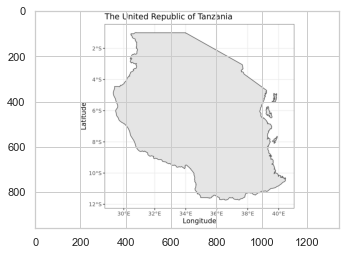

In [96]:
#Import image of Tanzania
image = mpimg.imread("Images/Tanzania.png")
plt.imshow(image)
plt.show()

In [97]:
# Filter out rows where the 'Value' column is 0
train_df3 = train_df2[train_df2['longitude'] != 0]

print("\nDataFrame after dropping rows with 0:\n",train_df3)


DataFrame after dropping rows with 0:
           id  amount_tsh  date_recorded  gps_height     installer  longitude  \
0      69572      6000.0           2011        1390         Roman  34.938093   
1       8776         0.0           2013        1399       GRUMETI  34.698766   
2      34310        25.0           2013         686  World vision  37.460664   
3      67743         0.0           2013         263        UNICEF  38.486161   
4      19728         0.0           2011           0       Artisan  31.130847   
...      ...         ...            ...         ...           ...        ...   
59395  60739        10.0           2013        1210           CES  37.169807   
59396  27263      4700.0           2011        1212          Cefa  35.249991   
59397  37057         0.0           2011           0       Unknown  34.017087   
59398  31282         0.0           2011           0          Musa  35.861315   
59399  26348         0.0           2011         191         World  38.104048   


In [98]:
train_df3 = train_df3[train_df3['latitude'] != 0]

print("\nDataFrame after dropping rows with 0:\n",train_df3)


DataFrame after dropping rows with 0:
           id  amount_tsh  date_recorded  gps_height     installer  longitude  \
0      69572      6000.0           2011        1390         Roman  34.938093   
1       8776         0.0           2013        1399       GRUMETI  34.698766   
2      34310        25.0           2013         686  World vision  37.460664   
3      67743         0.0           2013         263        UNICEF  38.486161   
4      19728         0.0           2011           0       Artisan  31.130847   
...      ...         ...            ...         ...           ...        ...   
59395  60739        10.0           2013        1210           CES  37.169807   
59396  27263      4700.0           2011        1212          Cefa  35.249991   
59397  37057         0.0           2011           0       Unknown  34.017087   
59398  31282         0.0           2011           0          Musa  35.861315   
59399  26348         0.0           2011         191         World  38.104048   


In [99]:
train_df3

,id,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,basin,subvillage,region,...,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type
0,69572,6000.0,2011,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,...,False,1999,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe
1,8776,0.0,2013,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,...,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,34310,25.0,2013,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,...,True,2009,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple
3,67743,0.0,2013,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,True,1986,submersible,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
4,19728,0.0,2011,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,...,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013,1210,CES,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,...,True,1999,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe
59396,27263,4700.0,2011,1212,Cefa,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,...,True,1996,gravity,user-group,annually,soft,enough,river,surface,communal standpipe
59397,37057,0.0,2011,0,Unknown,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,...,False,0,swn 80,user-group,monthly,fluoride,enough,machine dbh,groundwater,hand pump
59398,31282,0.0,2011,0,Musa,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,...,True,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump


In [100]:
# Test
test_df3 = test_df2[test_df2['longitude'] != 0]

print("\nDataFrame after dropping rows with 0:\n",test_df3)


DataFrame after dropping rows with 0:
           id  amount_tsh  date_recorded  gps_height   installer  longitude  \
0      50785         0.0           2013        1996        DMDD  35.290799   
1      51630         0.0           2013        1569         DWE  36.656709   
2      17168         0.0           2013        1567     Unknown  34.767863   
3      45559         0.0           2013         267  FINN WATER  38.058046   
4      49871       500.0           2013        1260      BRUDER  35.006123   
...      ...         ...            ...         ...         ...        ...   
14845  39307         0.0           2011          34          Da  38.852669   
14846  18990      1000.0           2011           0        HIAP  37.451633   
14847  28749         0.0           2013        1476     Unknown  34.739804   
14848  33492         0.0           2013         998         DWE  35.432732   
14849  68707         0.0           2013         481  Government  34.765054   

        latitude       

In [101]:
test_df3 = test_df3[test_df3['latitude'] != 0]

print("\nDataFrame after dropping rows with 0:\n",test_df3)


DataFrame after dropping rows with 0:
           id  amount_tsh  date_recorded  gps_height   installer  longitude  \
0      50785         0.0           2013        1996        DMDD  35.290799   
1      51630         0.0           2013        1569         DWE  36.656709   
2      17168         0.0           2013        1567     Unknown  34.767863   
3      45559         0.0           2013         267  FINN WATER  38.058046   
4      49871       500.0           2013        1260      BRUDER  35.006123   
...      ...         ...            ...         ...         ...        ...   
14845  39307         0.0           2011          34          Da  38.852669   
14846  18990      1000.0           2011           0        HIAP  37.451633   
14847  28749         0.0           2013        1476     Unknown  34.739804   
14848  33492         0.0           2013         998         DWE  35.432732   
14849  68707         0.0           2013         481  Government  34.765054   

        latitude       

In [102]:
# Concatenate vertically

#concat = pd.concat([train_df3, test_df3])
concat = train_df3
print("\nVertically Concatenated DataFrame (default behavior):")
print(concat)


Vertically Concatenated DataFrame (default behavior):
          id  amount_tsh  date_recorded  gps_height     installer  longitude  \
0      69572      6000.0           2011        1390         Roman  34.938093   
1       8776         0.0           2013        1399       GRUMETI  34.698766   
2      34310        25.0           2013         686  World vision  37.460664   
3      67743         0.0           2013         263        UNICEF  38.486161   
4      19728         0.0           2011           0       Artisan  31.130847   
...      ...         ...            ...         ...           ...        ...   
59395  60739        10.0           2013        1210           CES  37.169807   
59396  27263      4700.0           2011        1212          Cefa  35.249991   
59397  37057         0.0           2011           0       Unknown  34.017087   
59398  31282         0.0           2011           0          Musa  35.861315   
59399  26348         0.0           2011         191         World

In [103]:
df= pd.concat([concat, train_status], axis = 1, join= 'inner')
df

,id,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,basin,subvillage,region,...,extraction_type,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,id,status_group
0,69572,6000.0,2011,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,...,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,69572,functional
1,8776,0.0,2013,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,...,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,8776,functional
2,34310,25.0,2013,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,...,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,34310,functional
3,67743,0.0,2013,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,submersible,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,67743,non functional
4,19728,0.0,2011,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,...,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,19728,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013,1210,CES,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,...,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,60739,functional
59396,27263,4700.0,2011,1212,Cefa,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,...,gravity,user-group,annually,soft,enough,river,surface,communal standpipe,27263,functional
59397,37057,0.0,2011,0,Unknown,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,...,swn 80,user-group,monthly,fluoride,enough,machine dbh,groundwater,hand pump,37057,functional
59398,31282,0.0,2011,0,Musa,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,...,nira/tanira,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,31282,functional


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 57588 non-null  int64  
 1   amount_tsh         57588 non-null  float64
 2   date_recorded      57588 non-null  int64  
 3   gps_height         57588 non-null  int64  
 4   installer          57588 non-null  object 
 5   longitude          57588 non-null  float64
 6   latitude           57588 non-null  float64
 7   basin              57588 non-null  object 
 8   subvillage         57588 non-null  object 
 9   region             57588 non-null  object 
 10  region_code        57588 non-null  int64  
 11  district_code      57588 non-null  int64  
 12  lga                57588 non-null  object 
 13  population         57588 non-null  int64  
 14  public_meeting     57588 non-null  object 
 15  scheme_management  57588 non-null  object 
 16  permit             575

In [105]:
df.shape

(57588, 28)

In [106]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'management_group', 'payment_type', 'water_quality', 'quantity',
       'source', 'source_class', 'waterpoint_type', 'id', 'status_group'],
      dtype='object')

In [107]:
# Create a new DataFrame without 'col_B'
df_without_id = df.drop(columns=['id'])

print("\nDataFrame after dropping 'id':")
print(df_without_id)

# The original DataFrame is unchanged
print("\nOriginal DataFrame (unchanged):")
print(df)


DataFrame after dropping 'id':
       amount_tsh  date_recorded  gps_height     installer  longitude  \
0          6000.0           2011        1390         Roman  34.938093   
1             0.0           2013        1399       GRUMETI  34.698766   
2            25.0           2013         686  World vision  37.460664   
3             0.0           2013         263        UNICEF  38.486161   
4             0.0           2011           0       Artisan  31.130847   
...           ...            ...         ...           ...        ...   
59395        10.0           2013        1210           CES  37.169807   
59396      4700.0           2011        1212          Cefa  35.249991   
59397         0.0           2011           0       Unknown  34.017087   
59398         0.0           2011           0          Musa  35.861315   
59399         0.0           2011         191         World  38.104048   

        latitude                    basin    subvillage       region  \
0      -9.856322   

In [108]:
df_without_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         57588 non-null  float64
 1   date_recorded      57588 non-null  int64  
 2   gps_height         57588 non-null  int64  
 3   installer          57588 non-null  object 
 4   longitude          57588 non-null  float64
 5   latitude           57588 non-null  float64
 6   basin              57588 non-null  object 
 7   subvillage         57588 non-null  object 
 8   region             57588 non-null  object 
 9   region_code        57588 non-null  int64  
 10  district_code      57588 non-null  int64  
 11  lga                57588 non-null  object 
 12  population         57588 non-null  int64  
 13  public_meeting     57588 non-null  object 
 14  scheme_management  57588 non-null  object 
 15  permit             57588 non-null  object 
 16  construction_year  575

In [109]:
df_without_id.isna().sum()

amount_tsh           0
date_recorded        0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
subvillage           0
region               0
region_code          0
district_code        0
lga                  0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management_group     0
payment_type         0
water_quality        0
quantity             0
source               0
source_class         0
waterpoint_type      0
status_group         0
dtype: int64

In [110]:
df_without_id.status_group.value_counts()

functional                 31389
non functional             22268
functional needs repair     3931
Name: status_group, dtype: int64

In [111]:
df_without_id = df_without_id.drop(columns=['region_code','district_code'], axis = 1)

print("\nDataFrame after dropping 'id':")
print(df_without_id)


DataFrame after dropping 'id':
       amount_tsh  date_recorded  gps_height     installer  longitude  \
0          6000.0           2011        1390         Roman  34.938093   
1             0.0           2013        1399       GRUMETI  34.698766   
2            25.0           2013         686  World vision  37.460664   
3             0.0           2013         263        UNICEF  38.486161   
4             0.0           2011           0       Artisan  31.130847   
...           ...            ...         ...           ...        ...   
59395        10.0           2013        1210           CES  37.169807   
59396      4700.0           2011        1212          Cefa  35.249991   
59397         0.0           2011           0       Unknown  34.017087   
59398         0.0           2011           0          Musa  35.861315   
59399         0.0           2011         191         World  38.104048   

        latitude                    basin    subvillage       region  \
0      -9.856322   

In [112]:
df_without_id['date_recorded']= pd.to_datetime(df_without_id['date_recorded'])
df_without_id['date_recorded'].dtypes

dtype('<M8[ns]')

In [113]:
df_without_id['construction_year'].dtypes

dtype('int64')

In [114]:
# convert permit to yes and no
mapping_dict = {
    True: 'Yes',
    False: 'No',
    'Unknown': 'No',
    np.nan: 'No' # You can also fill NaNs here if they exist
}

# Use the dictionary to replace all values at once
df_without_id['permit'] = df_without_id['permit'].replace(mapping_dict)

df_without_id.permit.value_counts()


Yes    38100
No     19488
Name: permit, dtype: int64

#### Univariate Analysis

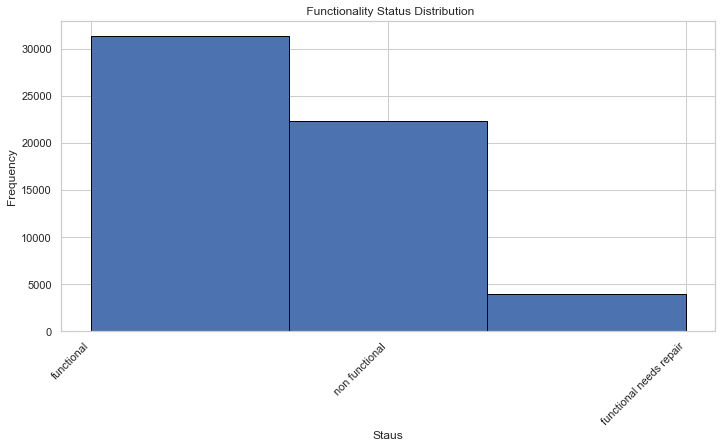

''

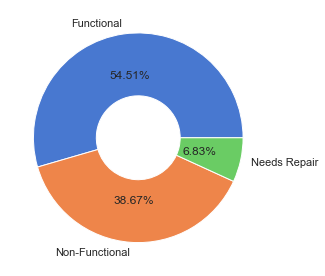

In [115]:
### status_group distribution

plt.figure(figsize=(10, 6))
plt.hist(df_without_id['status_group'], bins= 3, edgecolor='black')
plt.xticks(rotation= 45, ha='right')
plt.tight_layout()
plt.title(' Functionality Status Distribution')
plt.xlabel('Staus')
plt.ylabel('Frequency')
plt.show();



class_imb = df_without_id.status_group.value_counts(ascending=False)
label = ["Functional", "Non-Functional", "Needs Repair"]

#pie chart
color = sns.color_palette("muted")
plt.pie(class_imb, labels=label, autopct="%.2f%%", wedgeprops=dict(width=.6), colors=color)
plt.tight_layout()
;

**observation**
 - Most wells are fully functional, indicating a class imbalance in the 3 classes. 

#### Categorical Features


--- Value Counts for: status_group ---
functional                 31389
non functional             22268
functional needs repair     3931
Name: status_group, dtype: int64

--- Value Counts for: installer ---
DWE              16255
Unknown           3639
Government        1670
RWE               1181
Commu             1060
                 ...  
BIORE                1
St Gasper            1
Segera Estate        1
GDP                  1
WOYEGE               1
Name: installer, Length: 2113, dtype: int64

--- Value Counts for: basin ---
Pangani                    8940
Lake Victoria              8535
Rufiji                     7976
Internal                   7785
Lake Tanganyika            6333
Wami / Ruvu                5987
Lake Nyasa                 5085
Ruvuma / Southern Coast    4493
Lake Rukwa                 2454
Name: basin, dtype: int64

--- Value Counts for: water_quality ---
soft                  49431
salty                  4772
unknown                1661
milky                 

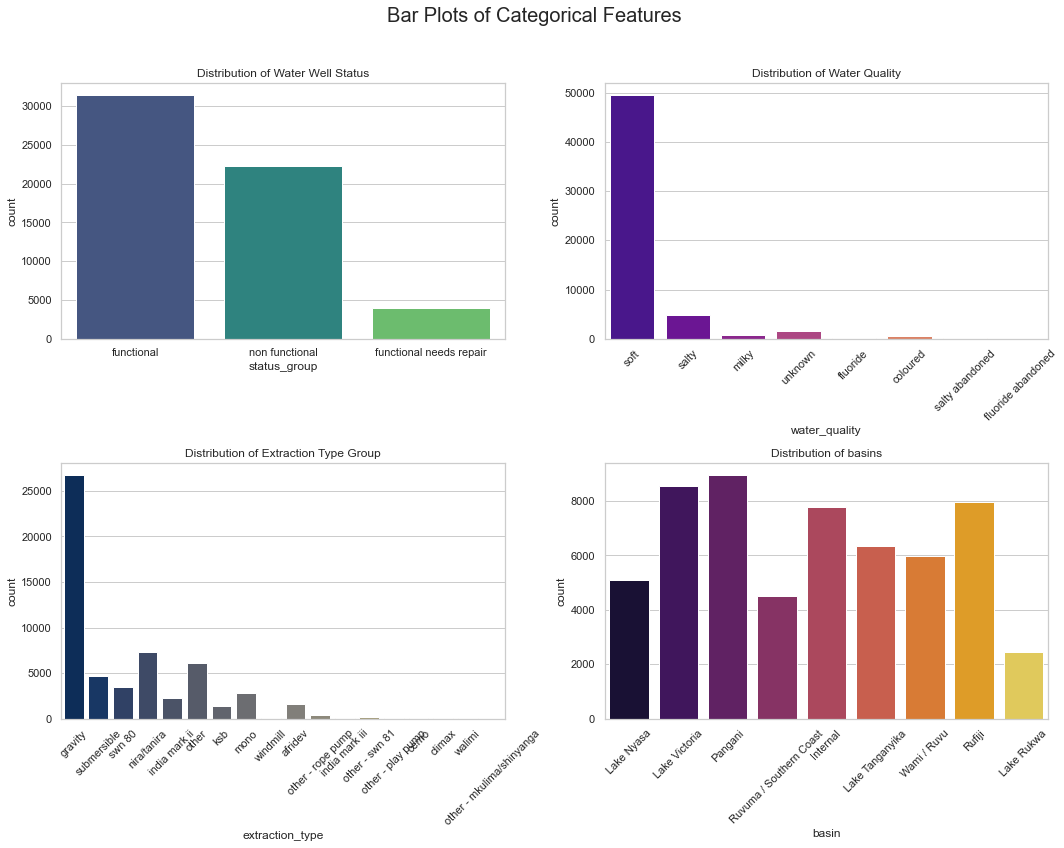

In [116]:
#Get value counts for a few key categorical features
categorical_features = ['status_group', 'installer', 'basin', 'water_quality', 'extraction_type']

for feature in categorical_features:
    print(f"\n--- Value Counts for: {feature} ---")
    print(df_without_id[feature].value_counts())

# Plot bar charts for key categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Bar Plots of Categorical Features', fontsize=20)

# The target variable: status_group
sns.countplot(x='status_group', data=df_without_id, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Distribution of Water Well Pump Status')

# categorical feature: water_quality
sns.countplot(x='water_quality', data=df_without_id, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Distribution of Water Quality')
axes[0, 1].tick_params(axis='x', rotation=45)

# categorical feature: extraction_type_group
sns.countplot(x='extraction_type', data=df_without_id, ax=axes[1, 0], palette='cividis')
axes[1, 0].set_title('Distribution of Extraction Type Group')
axes[1, 0].tick_params(axis='x', rotation=45)

#  categorical feature: management
sns.countplot(x='basin', data=df_without_id, ax=axes[1, 1], palette='inferno')
axes[1, 1].set_title('Distribution of basins')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Bivariate Analysis

#### Hydrological Features

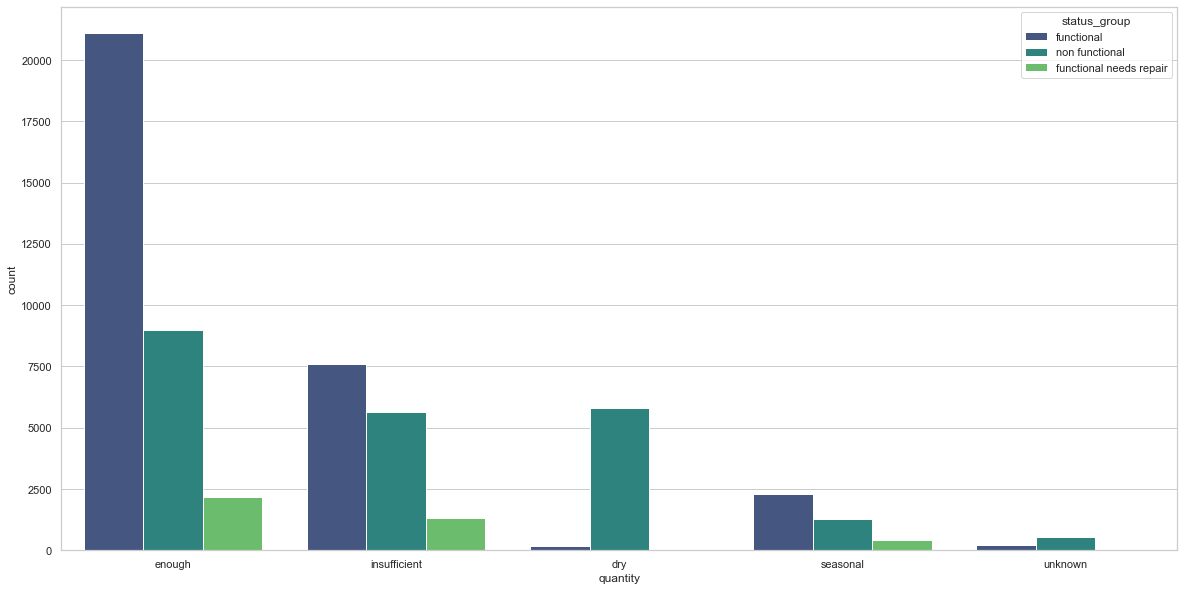

In [117]:
#Quantity
plt.figure(figsize=(20,10))
ax = sns.countplot(x='quantity', hue="status_group", data=df_without_id, palette='viridis')

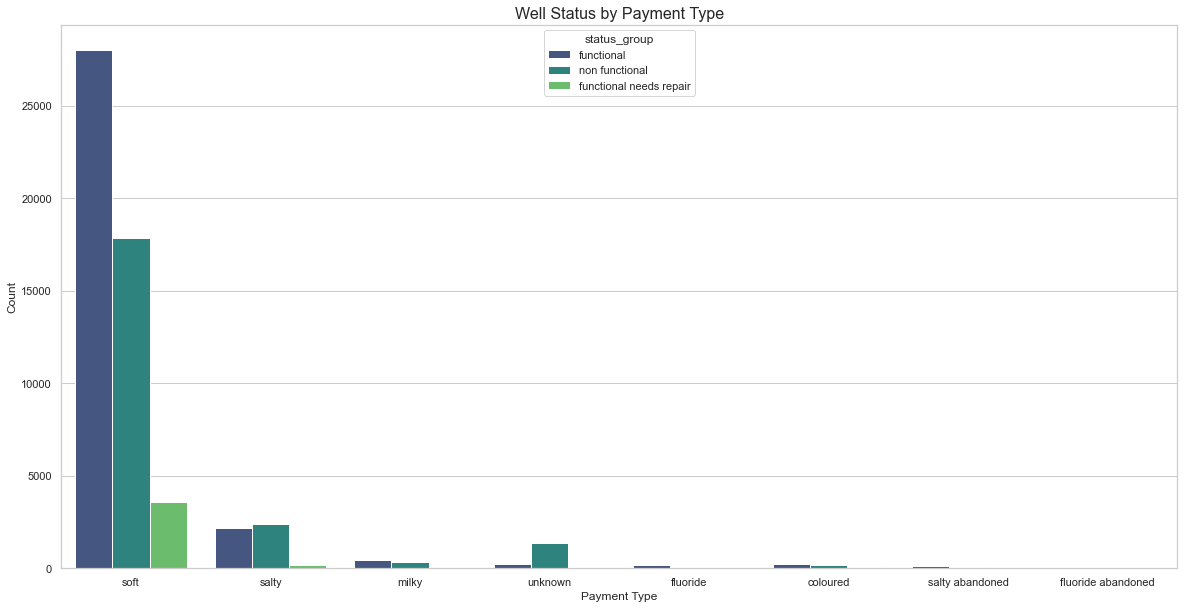

In [118]:
#Quality
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df_without_id, palette='viridis')
plt.title('Pump Status by Payment Type', fontsize=16)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

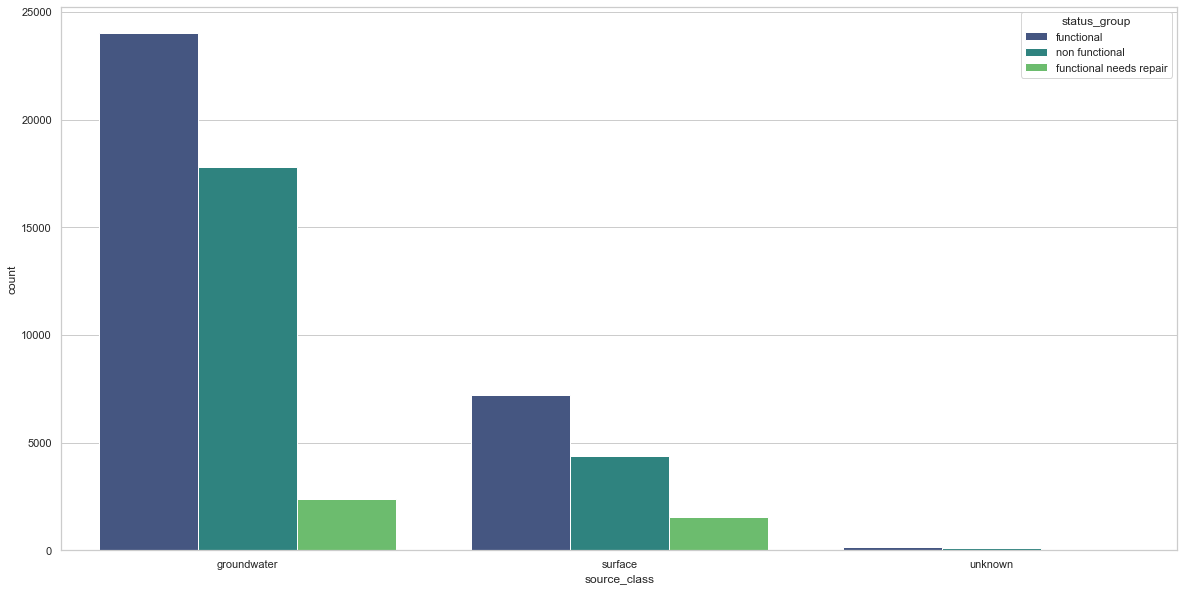

In [119]:
#Water Source
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source_class', hue="status_group", data=df_without_id, palette='viridis')

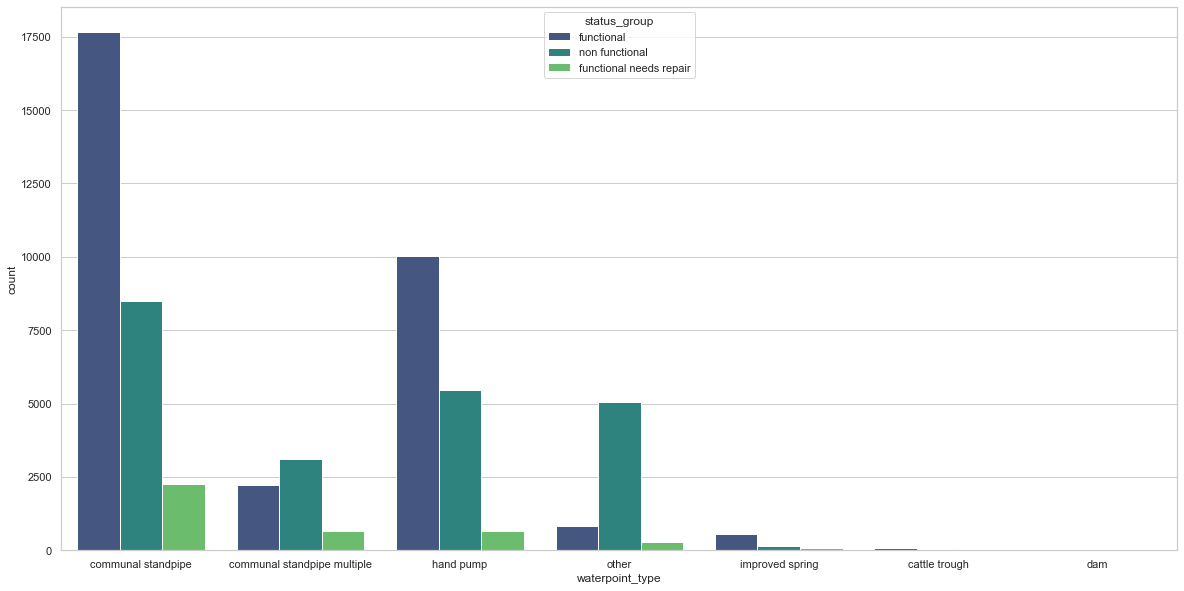

In [120]:
#Waterpoint type
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df_without_id, palette='viridis')

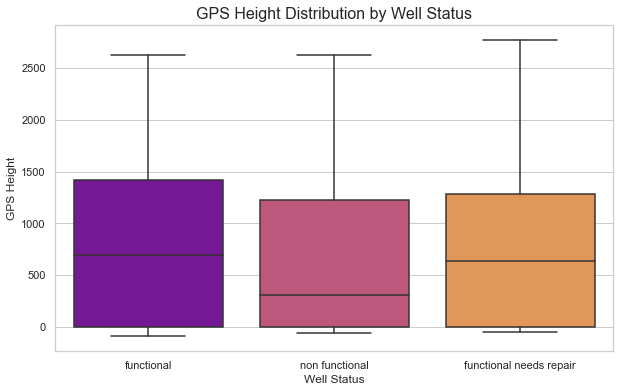

In [121]:
#gps_height vs status_group
plt.figure(figsize=(10, 6))
sns.boxplot(x='status_group', y='gps_height', data=df_without_id, palette='plasma')
plt.title('GPS Height Distribution by Well Pump Status', fontsize=16)
plt.xlabel('Well Status')
plt.ylabel('GPS Height')
plt.show()

**Observation**
* Most functional pumps are found at a communalstandpipe water point.
* Water quality in most of the functional pumps is soft.
* Majority of the fuctional pipes have enough water quantity and are from a groundwater source.

#### Geographical Features

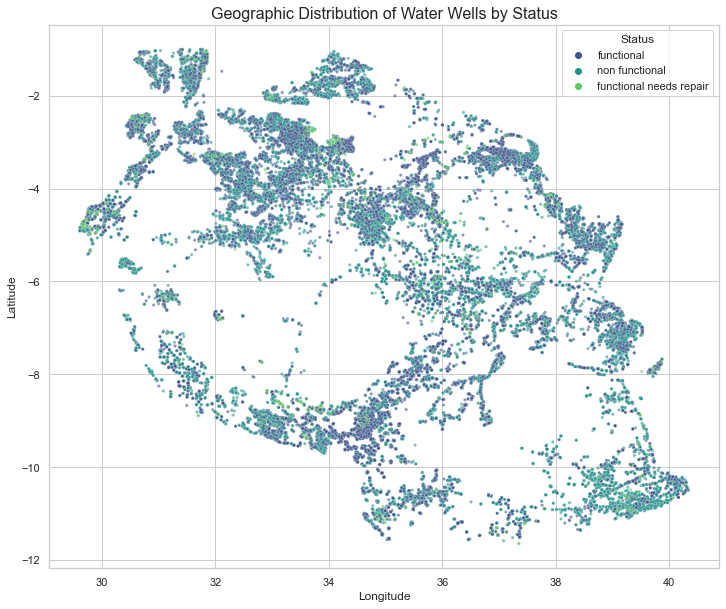

In [122]:
# scatter plot of well locations
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='status_group',
    palette='viridis',
    s=10,  # size of points
    alpha=0.6 # transparency
)
plt.title('Geographic Distribution of Water Well Pumps by Status', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Status')
plt.grid(True)
plt.show()

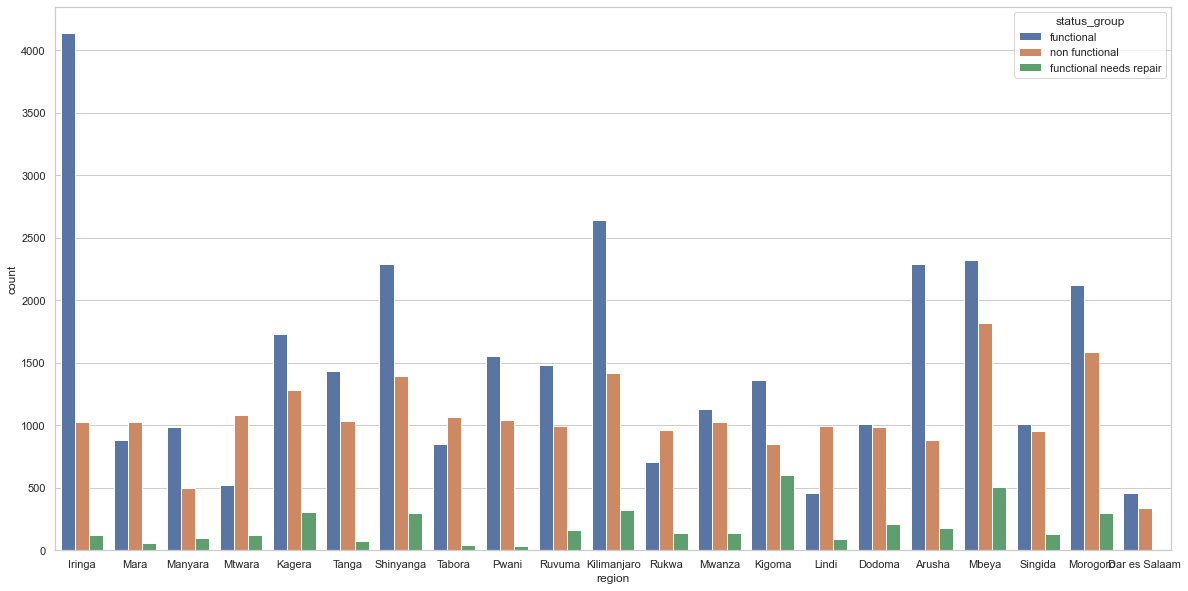

In [123]:
#Region
plt.figure(figsize=(20,10))
ax = sns.countplot(x='region', hue="status_group", data=df_without_id)

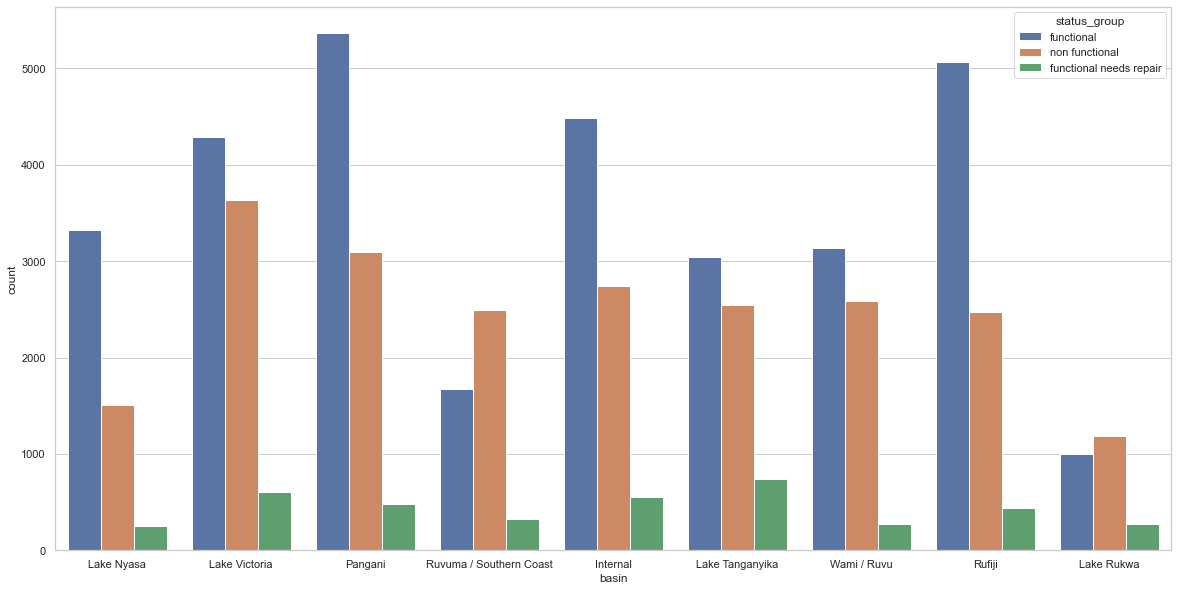

In [124]:
#basin

plt.figure(figsize=(20,10))
ax = sns.countplot(x='basin', hue="status_group", data=df_without_id)

**Observation**
   * Iringa region has the highest number of functional pumps. 
   * Mbeya region has the highest number of non functional pumps. 
   * Kigoma region  has the highest number of pumps that need repair.
   * Pangani basin has majority of the functional pumps 
   * Lake Victoria has majority of the non-functional pumps.

From the geographical plot, it appears that certain regions have a higher concentration of non-functional wells, 
suggesting regional disparities or specific infrastructure challenges in those areas."
  

#### Socio-Economic Features

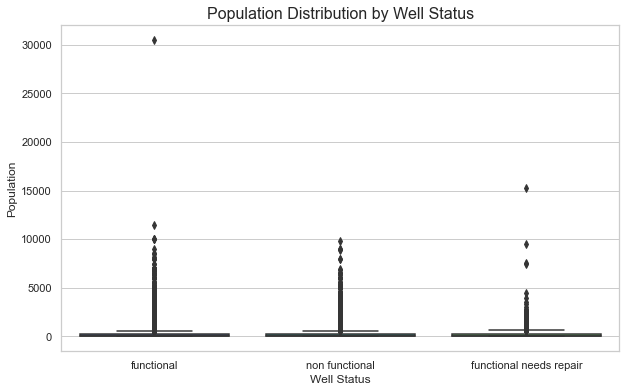

In [125]:
#population vs status_group
plt.figure(figsize=(10, 6))
sns.boxplot(x='status_group', y='population', data=df_without_id, palette='viridis')
plt.title('Population Distribution by Pump Functionality Status', fontsize=16)
plt.xlabel('Well Status')
plt.ylabel('Population')
plt.show()


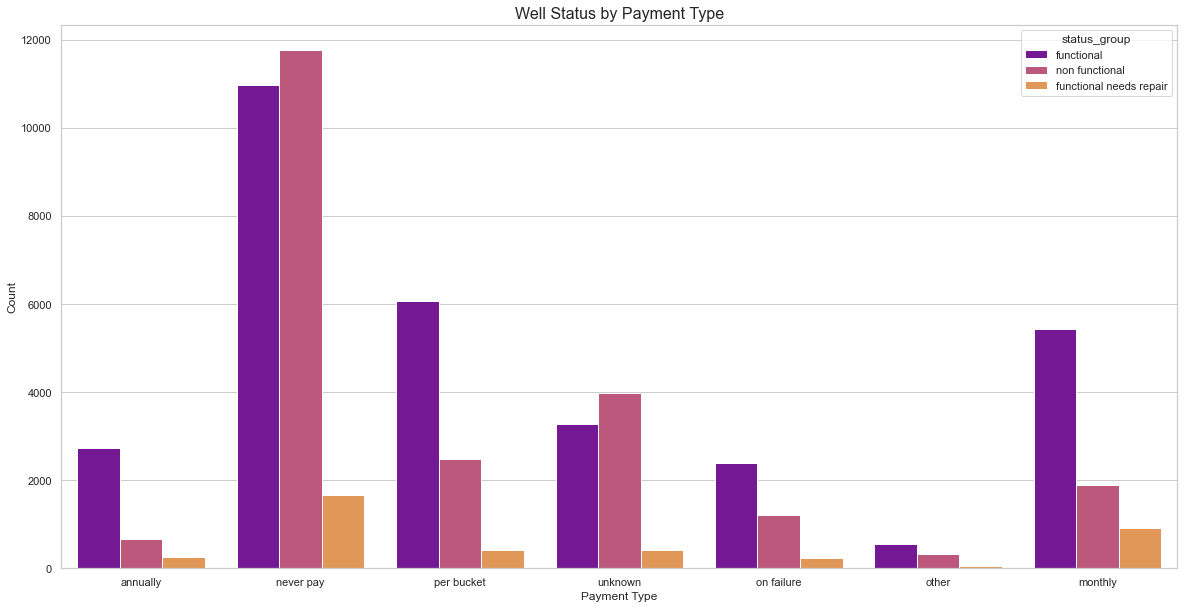

In [126]:
#payment type
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment_type', hue="status_group", data=df_without_id, palette='plasma')
plt.title('Well Status by Payment Type', fontsize=16)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

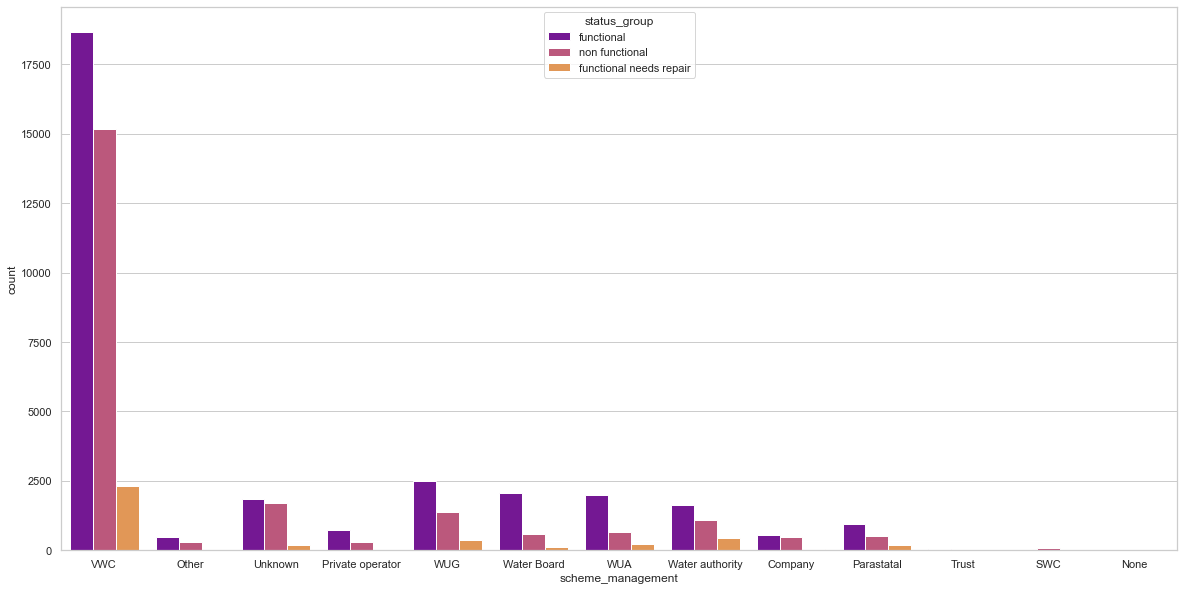

In [127]:
#Scheme Management
plt.figure(figsize=(20,10))
ax = sns.countplot(x='scheme_management', hue="status_group", data=df_without_id, palette='plasma')

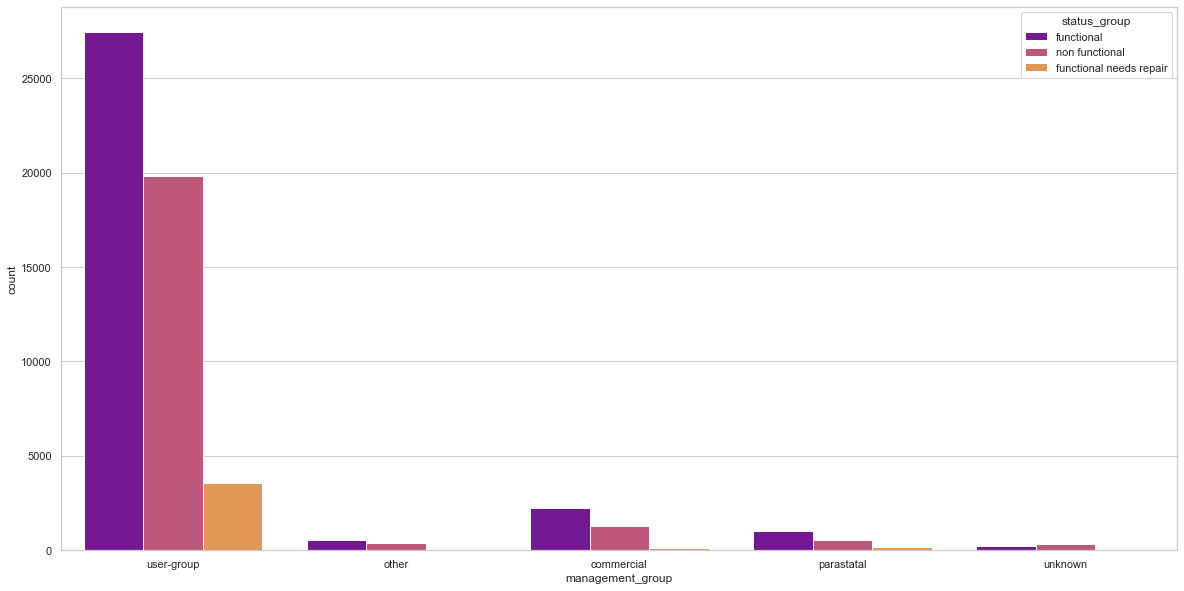

In [128]:
#management group
plt.figure(figsize=(20,10))
ax = sns.countplot(x='management_group', hue="status_group", data=df_without_id, palette='plasma')

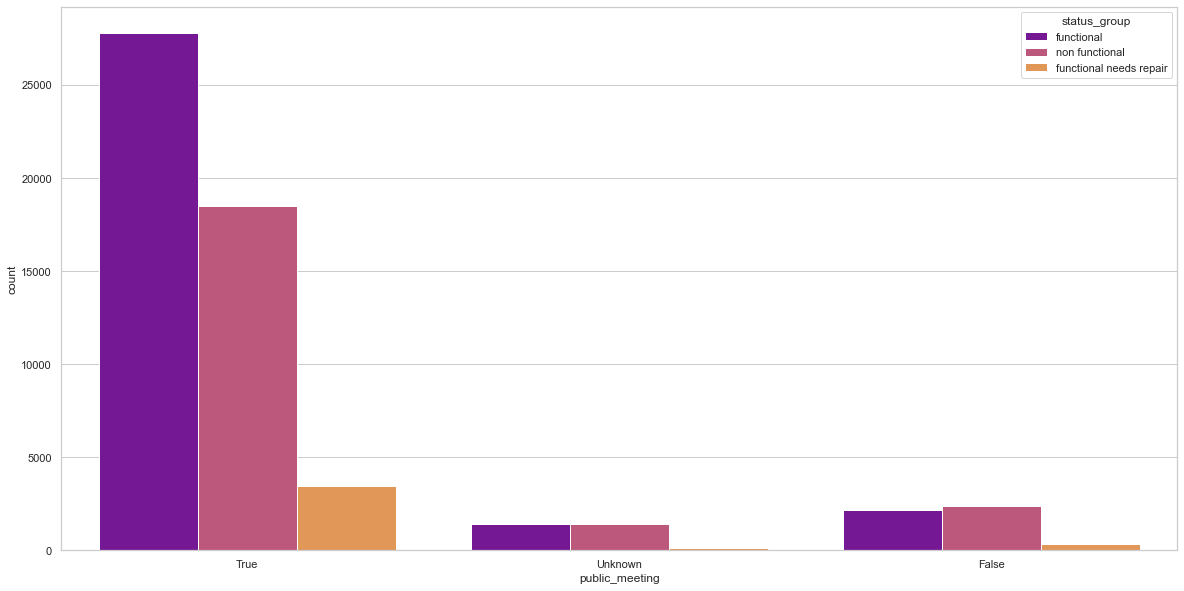

In [129]:
#Public meeting
plt.figure(figsize=(20,10))
ax = sns.countplot(x='public_meeting', hue="status_group", data=df_without_id, palette='plasma')

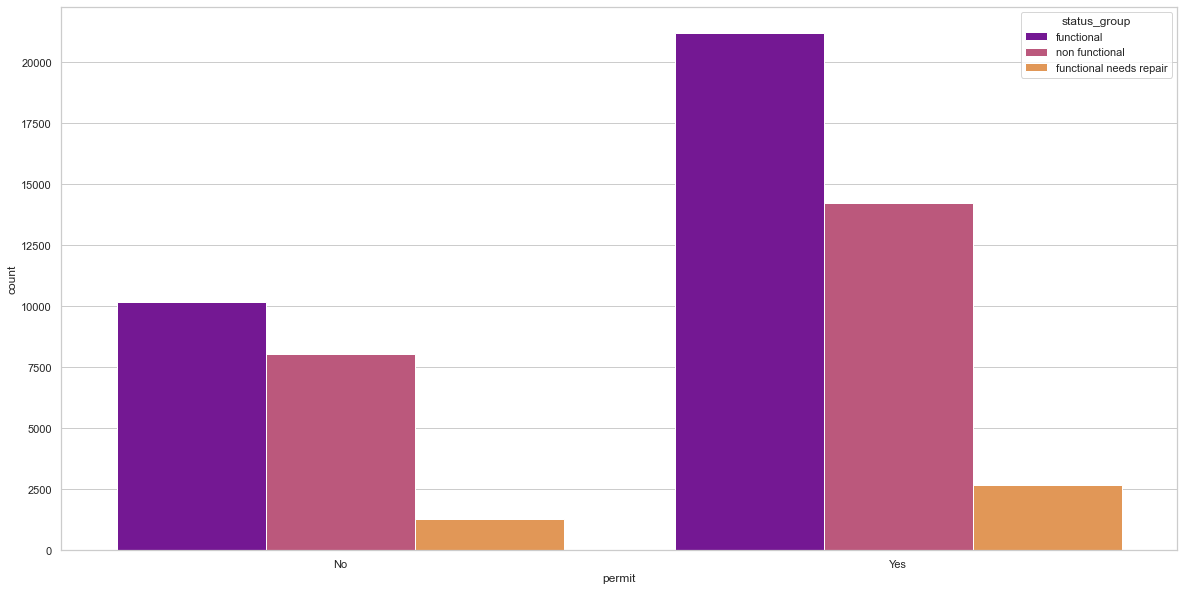

In [130]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='permit', hue="status_group", data=df_without_id, palette='plasma')

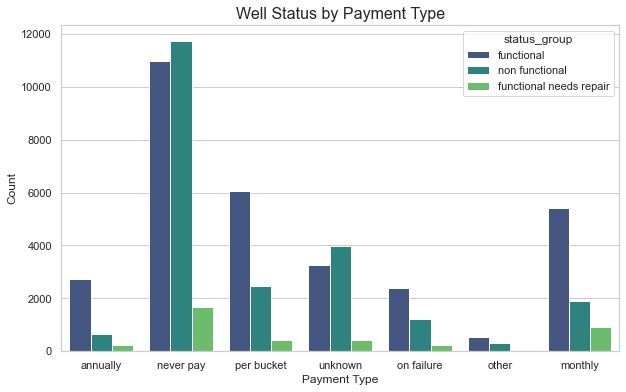

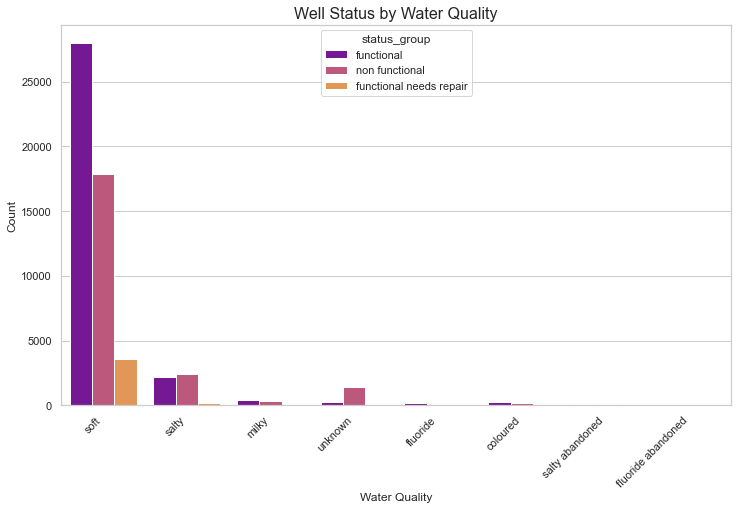

In [131]:
# Relationship between `payment_type` and `status_group`
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', hue='status_group', data=df_without_id, palette='viridis')
plt.title('Well Status by Payment Type', fontsize=16)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

 # Relationship between `water_quality` and `status_group`
plt.figure(figsize=(12, 7))
sns.countplot(x='water_quality', hue='status_group', data=df_without_id, palette='plasma')
plt.title('Well Status by Water Quality', fontsize=16)
plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Observation**
* Most non-functional pumps and pumps that need repair are found in wells that do not charge for water.
* Highest number of all pumps are found in water schemes managed by VWC
* When pumps are managed by the users, they are more likely to be functional.
* Participation in public meetings influence the pump functionality at the different wells.
* Having a permit ifluences the functionality of the pumps at different wells.


#### Multivariate Analysis

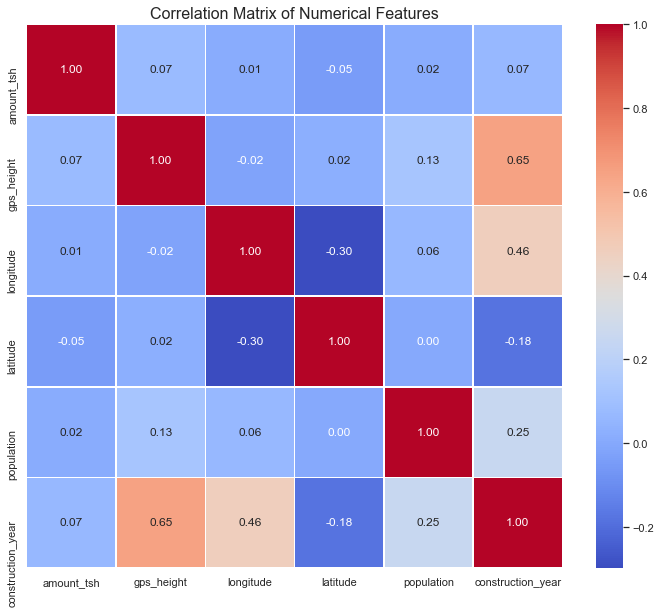

In [132]:
# Select only numerical columns for the correlation matrix
numerical_df = df_without_id.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## 4. Preprocessing 

#### Null values 

In [133]:
#create a copy for modeling

df2 = df_without_id.copy(deep=True)
df2

,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,basin,subvillage,region,lga,...,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,1970-01-01 00:00:00.000002011,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,Ludewa,...,1999,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,0.0,1970-01-01 00:00:00.000002013,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,Serengeti,...,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,1970-01-01 00:00:00.000002013,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,Simanjiro,...,2009,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,0.0,1970-01-01 00:00:00.000002013,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,...,1986,submersible,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,0.0,1970-01-01 00:00:00.000002011,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,Karagwe,...,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1970-01-01 00:00:00.000002013,1210,CES,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,Hai,...,1999,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,functional
59396,4700.0,1970-01-01 00:00:00.000002011,1212,Cefa,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,Njombe,...,1996,gravity,user-group,annually,soft,enough,river,surface,communal standpipe,functional
59397,0.0,1970-01-01 00:00:00.000002011,0,Unknown,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,Mbarali,...,0,swn 80,user-group,monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional
59398,0.0,1970-01-01 00:00:00.000002011,0,Musa,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,Chamwino,...,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,functional


In [134]:
df2.isnull().sum().any()

False

In [135]:
rows_with_nan = df2[df2.isnull().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [amount_tsh, date_recorded, gps_height, installer, longitude, latitude, basin, subvillage, region, lga, population, public_meeting, scheme_management, permit, construction_year, extraction_type, management_group, payment_type, water_quality, quantity, source, source_class, waterpoint_type, status_group]
Index: []

[0 rows x 24 columns]


In [136]:
df2.duplicated().sum()

23

In [137]:
# Display only the subsequent duplicate rows
subsequent_duplicates = df2[df2.duplicated()]
print(subsequent_duplicates)

       amount_tsh                 date_recorded  gps_height installer  \
8630          0.0 1970-01-01 00:00:00.000002011         557       RWE   
8979          0.0 1970-01-01 00:00:00.000002011         562       RWE   
10267         0.0 1970-01-01 00:00:00.000002011         583       RWE   
13864         0.0 1970-01-01 00:00:00.000002011         556       RWE   
24995         0.0 1970-01-01 00:00:00.000002011         559       RWE   
28701         0.0 1970-01-01 00:00:00.000002011         532       DWE   
29367         0.0 1970-01-01 00:00:00.000002011         486   Gwaseco   
29872         0.0 1970-01-01 00:00:00.000002011         512       DWE   
30760         0.0 1970-01-01 00:00:00.000002011         519       RWE   
37766         0.0 1970-01-01 00:00:00.000002011         576  Hanja Lt   
38604         0.0 1970-01-01 00:00:00.000002011         590       RWE   
39187         0.0 1970-01-01 00:00:00.000002011           0        HE   
41398         0.0 1970-01-01 00:00:00.000002011    

In [138]:
# Drop duplicates and create a new DataFrame
df3 = df2.drop_duplicates()
print(df3.duplicated().sum())

0


In [139]:
df3.status_group.unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [140]:
df3.permit.unique()

array(['No', 'Yes'], dtype=object)

In [141]:
df3.public_meeting.value_counts()

True       49714
False       4875
Unknown     2976
Name: public_meeting, dtype: int64

In [142]:
mapping_dict = {
    True: 'Yes',
    False: 'No'}

# Use the dictionary to replace all values at once
df3['public_meeting'] = df3['public_meeting'].replace(mapping_dict)

print(df3)

       amount_tsh                 date_recorded  gps_height     installer  \
0          6000.0 1970-01-01 00:00:00.000002011        1390         Roman   
1             0.0 1970-01-01 00:00:00.000002013        1399       GRUMETI   
2            25.0 1970-01-01 00:00:00.000002013         686  World vision   
3             0.0 1970-01-01 00:00:00.000002013         263        UNICEF   
4             0.0 1970-01-01 00:00:00.000002011           0       Artisan   
...           ...                           ...         ...           ...   
59395        10.0 1970-01-01 00:00:00.000002013        1210           CES   
59396      4700.0 1970-01-01 00:00:00.000002011        1212          Cefa   
59397         0.0 1970-01-01 00:00:00.000002011           0       Unknown   
59398         0.0 1970-01-01 00:00:00.000002011           0          Musa   
59399         0.0 1970-01-01 00:00:00.000002011         191         World   

       longitude   latitude                    basin    subvillage  \
0    

In [143]:

#df3['status_group'] = df3['status_group'].apply(lambda x: 1 if x == 'functional' else 0)

# Handle missing values and high cardinality for categorical features

for col in ['installer', 'subvillage', 'scheme_management', 'public_meeting', 'permit']:
    # Replace unkown with mode
    if df3[col].dtype == 'object':
        mode = df3[col].mode()[0]
        df3[col].replace('Unknown', mode, inplace=True)

    # Group infrequent categories into 'other'
    counts = df3[col].value_counts(normalize=True)
    infrequent_categories = counts[counts < 0.05].index
    df3[col] = df3[col].apply(lambda x: 'other' if x in infrequent_categories else x)

 #Handle missing/zero values for numerical features
for col in ['population', 'construction_year']:
    
    # Replace zeros with NaNs, as they likely mean missing data
    median= df3[col].median()
    df3[col].replace(0, median, inplace=True)

# Feature Engineering: 'pump_age'
# Asumption: the recording date is from 2013, a common reference point for this dataset
df3['date_recorded'] = pd.to_datetime(df3['date_recorded'])
df3['age'] = df3['date_recorded'].dt.year - df3['construction_year']

# Drop original features we no longer need after engineering
df3.drop(['date_recorded', 'construction_year'], axis=1, inplace=True)


In [144]:
df3

,amount_tsh,gps_height,installer,longitude,latitude,basin,subvillage,region,lga,population,...,extraction_type,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group,age
0,6000.0,1390,other,34.938093,-9.856322,Lake Nyasa,other,Iringa,Ludewa,109,...,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,functional,-29
1,0.0,1399,other,34.698766,-2.147466,Lake Victoria,other,Mara,Serengeti,280,...,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,-40
2,25.0,686,other,37.460664,-3.821329,Pangani,other,Manyara,Simanjiro,250,...,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,-39
3,0.0,263,other,38.486161,-11.155298,Ruvuma / Southern Coast,other,Mtwara,Nanyumbu,58,...,submersible,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional,-16
4,0.0,0,other,31.130847,-1.825359,Lake Victoria,other,Kagera,Karagwe,35,...,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,other,37.169807,-3.253847,Pangani,other,Kilimanjaro,Hai,125,...,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,functional,-29
59396,4700.0,1212,other,35.249991,-9.070629,Rufiji,other,Iringa,Njombe,56,...,gravity,user-group,annually,soft,enough,river,surface,communal standpipe,functional,-26
59397,0.0,0,DWE,34.017087,-8.750434,Rufiji,other,Mbeya,Mbarali,35,...,swn 80,user-group,monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional,-18
59398,0.0,0,other,35.861315,-6.378573,Rufiji,other,Dodoma,Chamwino,35,...,nira/tanira,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,functional,-18


In [145]:
df3.status_group.value_counts()

functional                 31380
non functional             22256
functional needs repair     3929
Name: status_group, dtype: int64

In [146]:
# Filter out rows where the 'Category' column contains 'other'
values_to_remove = ['other', 'Other', 'unknown', 'Unknown']
df4 = df3[~df3['installer'].isin(values_to_remove)]
print("Filtered by 'Category' column:")
print(df4)


Filtered by 'Category' column:
       amount_tsh  gps_height installer  longitude  latitude            basin  \
5            20.0           0       DWE  39.172796 -4.765587          Pangani   
7             0.0           0       DWE  32.620617 -4.226198  Lake Tanganyika   
15            0.0        1645       DWE  31.444121 -8.274962  Lake Tanganyika   
16          500.0        1703       DWE  34.642439 -9.106185           Rufiji   
17            0.0        1656       DWE  34.569266 -9.085515           Rufiji   
...           ...         ...       ...        ...       ...              ...   
59386         0.0        1786       DWE  31.738789 -8.532013       Lake Rukwa   
59388         0.0        1414       DWE  30.692400 -3.593827  Lake Tanganyika   
59389         0.0         783       DWE  30.646486 -7.365418  Lake Tanganyika   
59390         0.0        1715       DWE  31.370848 -8.258160  Lake Tanganyika   
59397         0.0           0       DWE  34.017087 -8.750434           Rufiji 

In [147]:
required = ['age','amount_tsh', 'extraction_type','source','water_quality',
           'quantity','payment_type','management_group','installer','public_meeting',
            'population','longitude', 'latitude',
       'basin','region', 'gps_height', 'permit','status_group']
df5 = df4[required]
df5

,age,amount_tsh,extraction_type,source,water_quality,quantity,payment_type,management_group,installer,public_meeting,population,longitude,latitude,basin,region,gps_height,permit,status_group
5,-39,20.0,submersible,other,salty,enough,per bucket,user-group,DWE,Yes,1,39.172796,-4.765587,Pangani,Tanga,0,Yes,functional
7,-18,0.0,nira/tanira,shallow well,milky,enough,unknown,user-group,DWE,Yes,35,32.620617,-4.226198,Lake Tanganyika,Shinyanga,0,Yes,non functional
15,-21,0.0,swn 80,machine dbh,soft,enough,never pay,user-group,DWE,Yes,200,31.444121,-8.274962,Lake Tanganyika,Rukwa,1645,No,functional
16,-8,500.0,gravity,river,soft,dry,monthly,user-group,DWE,Yes,35,34.642439,-9.106185,Rufiji,Iringa,1703,Yes,non functional
17,-8,0.0,gravity,river,soft,dry,on failure,user-group,DWE,Yes,50,34.569266,-9.085515,Rufiji,Iringa,1656,Yes,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59386,-39,0.0,india mark ii,machine dbh,soft,enough,never pay,user-group,DWE,Yes,1000,31.738789,-8.532013,Lake Rukwa,Rukwa,1786,No,functional
59388,-25,0.0,gravity,spring,soft,insufficient,unknown,user-group,DWE,Yes,500,30.692400,-3.593827,Lake Tanganyika,Kigoma,1414,Yes,functional
59389,-39,0.0,india mark ii,machine dbh,soft,enough,never pay,user-group,DWE,No,1500,30.646486,-7.365418,Lake Tanganyika,Rukwa,783,No,functional
59390,-21,0.0,swn 80,machine dbh,soft,insufficient,never pay,user-group,DWE,Yes,150,31.370848,-8.258160,Lake Tanganyika,Rukwa,1715,No,functional


In [148]:
df5.public_meeting.value_counts()

Yes    18262
No      1627
Name: public_meeting, dtype: int64

In [149]:
df5.status_group.value_counts()

functional                 10898
non functional              7238
functional needs repair     1753
Name: status_group, dtype: int64

#### Splitting The Dataset

In [150]:
 #Define feature and target variables
X = df5.drop('status_group', axis=1)
y = df5['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [151]:
# resulting shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15911, 17)
(3978, 17)
(15911,)
(3978,)


In [152]:
#train set class distribution
y_train.value_counts(normalize=True)

functional                 0.547923
non functional             0.363899
functional needs repair    0.088178
Name: status_group, dtype: float64

In [153]:
#test set class distribution
y_test.value_counts(normalize=True)

functional                 0.548014
non functional             0.364002
functional needs repair    0.087984
Name: status_group, dtype: float64

In [154]:
X.columns

Index(['age', 'amount_tsh', 'extraction_type', 'source', 'water_quality',
       'quantity', 'payment_type', 'management_group', 'installer',
       'public_meeting', 'population', 'longitude', 'latitude', 'basin',
       'region', 'gps_height', 'permit'],
      dtype='object')

### Scaling and Imputing

In [155]:
# Identify numerical and categorical columns after dropping the original ones
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Imputation for numerical features
num_imputer = SimpleImputer(strategy='median')
X_train[numerical_features] = num_imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = num_imputer.transform(X_test[numerical_features])

# Imputation for categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_features] = cat_imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = cat_imputer.transform(X_test[categorical_features])

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder only on the training data
encoder.fit(X_train[categorical_features])

# Transform both training and test data
X_train_encoded = encoder.transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Create DataFrames with the new encoded columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

# Combine numerical and encoded categorical data
X_train_processed = pd.concat([X_train[numerical_features], X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test[numerical_features], X_test_encoded_df], axis=1)

# Scaling numerical features
scaler = StandardScaler()
X_train_processed[numerical_features] = scaler.fit_transform(X_train_processed[numerical_features])
X_test_processed[numerical_features] = scaler.transform(X_test_processed[numerical_features])

In [156]:
X_train_processed.head()

,age,amount_tsh,population,longitude,latitude,gps_height,extraction_type_afridev,extraction_type_cemo,extraction_type_gravity,extraction_type_india mark ii,...,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,permit_No,permit_Yes
27943,0.188324,-0.098243,-0.378176,0.046232,0.203454,1.215912,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3829,-0.660201,-0.098243,0.143669,1.624994,0.187870,-0.718706,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
25837,0.376885,-0.098243,-0.220939,1.649475,-0.055766,-1.009408,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
21953,0.376885,-0.098243,-0.300697,-0.457378,0.862623,-0.984698,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
25494,-0.094518,-0.098243,-0.045471,1.798010,-0.980121,-1.042838,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [157]:
X_test_processed.head()

,age,amount_tsh,population,longitude,latitude,gps_height,extraction_type_afridev,extraction_type_cemo,extraction_type_gravity,extraction_type_india mark ii,...,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,permit_No,permit_Yes
55740,0.376885,-0.098243,-0.300697,-0.440700,0.846989,-0.984698,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8636,0.282605,-0.098243,0.075305,1.673478,0.023337,-0.975977,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
20363,-0.943043,-0.098243,0.531065,-1.542353,0.751496,1.051666,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16892,0.376885,-0.098243,-0.300697,-0.312746,-1.146366,-0.984698,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42741,0.376885,-0.098243,-0.300697,-0.877308,0.849581,-0.984698,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [158]:
y_train.value_counts()

functional                 8718
non functional             5790
functional needs repair    1403
Name: status_group, dtype: int64

## 5. Modelling

### Baseline Model

In [159]:
lr = LogisticRegression(random_state = 42 , multi_class = 'multinomial', max_iter= 1000)
lr.fit(X_train_processed, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [160]:
print(f" the model score on training dataset is {lr.score(X_train_processed, y_train)*100:.2f}%")

 the model score on training dataset is 72.51%


In [161]:
y_pred = lr.predict(X_test_processed)

#accuracy
accuracy_score(y_test, y_pred)*100

72.54901960784314

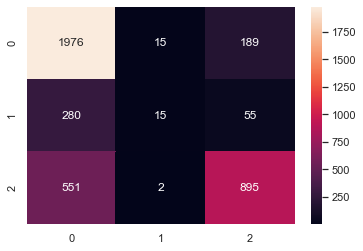

In [162]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt = 'd');

In [163]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

             functional       0.70      0.91      0.79      2180
functional needs repair       0.47      0.04      0.08       350
         non functional       0.79      0.62      0.69      1448

               accuracy                           0.73      3978
              macro avg       0.65      0.52      0.52      3978
           weighted avg       0.71      0.73      0.69      3978



In [183]:
# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)


# Initialize and train the logistic regression model
model = LogisticRegression(random_state = 42 , multi_class = 'multinomial', max_iter= 1000)
model.fit(X_resampled, y_resampled)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_processed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.618149824032177

Classification Report:
                         precision    recall  f1-score   support

             functional       0.77      0.62      0.69      2180
functional needs repair       0.21      0.63      0.31       350
         non functional       0.77      0.61      0.68      1448

               accuracy                           0.62      3978
              macro avg       0.58      0.62      0.56      3978
           weighted avg       0.72      0.62      0.65      3978



### Random Forest 

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
# n_estimators: The number of trees in the forest. More trees generally lead to better performance but take longer to train.
# max_depth: The maximum depth of each tree. This helps prevent overfitting.
# random_state: Ensures reproducibility of the results.
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest model on your processed training data
rf_classifier.fit(X_train_processed, y_train)

# Make predictions on the processed test data
y_pred_rf = rf_classifier.predict(X_test_processed)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}%")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 75.11%

Classification Report:
                         precision    recall  f1-score   support

             functional       0.71      0.95      0.81      2180
functional needs repair       0.68      0.08      0.14       350
         non functional       0.87      0.61      0.72      1448

               accuracy                           0.75      3978
              macro avg       0.76      0.55      0.56      3978
           weighted avg       0.77      0.75      0.72      3978



In [167]:
# Train the Random Forest on Smote training data
rf_classifier.fit(X_resampled, y_resampled)

# predictions on the processed test 
y_pred_rf_smote = rf_classifier.predict(X_test_processed)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf_smote) * 100
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}%")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_smote))

Random Forest Model Accuracy: 68.88%

Classification Report:
                         precision    recall  f1-score   support

             functional       0.79      0.72      0.75      2180
functional needs repair       0.26      0.67      0.38       350
         non functional       0.85      0.65      0.74      1448

               accuracy                           0.69      3978
              macro avg       0.63      0.68      0.62      3978
           weighted avg       0.77      0.69      0.71      3978



### XGBOOST

In [168]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), 
                               n_estimators=100, learning_rate=0.1, use_label_encoder=False, 
                               eval_metric='mlogloss', random_state=42)

# Train the XGBoost model on your processed training data
xgb_classifier.fit(X_train_processed, y_train)

# Make predictions on the processed test data
y_pred_xgb = xgb_classifier.predict(X_test_processed)

# Calculate and print the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f}%")
# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

[00:10:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Model Accuracy: 77.53%

Classification Report:
                         precision    recall  f1-score   support

             functional       0.75      0.93      0.83      2180
functional needs repair       0.58      0.21      0.31       350
         non functional       0.87      0.67      0.76      1448

               accuracy                           0.78      3978
              macro avg       0.73      0.61      0.63      3978
           weighted avg       0.78      0.78      0.76      3978



### SMOTE XGBOOST model

In [169]:
xgb_classifier.fit(X_resampled, y_resampled)

# Make predictions on the processed test data
y_pred_xgb_smote = xgb_classifier.predict(X_test_processed)

# Calculate and print the accuracy
accuracy_xgb_smote = accuracy_score(y_test, y_pred_xgb_smote) * 100
print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_smote))

[00:10:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Model Accuracy: 77.53%

Classification Report:
                         precision    recall  f1-score   support

             functional       0.80      0.74      0.77      2180
functional needs repair       0.28      0.61      0.38       350
         non functional       0.84      0.69      0.76      1448

               accuracy                           0.71      3978
              macro avg       0.64      0.68      0.64      3978
           weighted avg       0.77      0.71      0.73      3978



### Model 3 Randomized Search for Hyperparameter Tuning

In [170]:
# Define the model to be tuned
model = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), 
                               n_estimators=100, learning_rate=0.1, use_label_encoder=False, 
                               eval_metric='mlogloss', random_state=42)

# Define the hyperparameter distributions to sample from
# Use distributions instead of a fixed grid for continuous hyperparameters
param_distributions = {
    'C': loguniform(1e-4, 1e2),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0, 0.5, 1]
}


# Perform random search
random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='recall_weighted', n_jobs=-1, verbose = 1)

# Fit the random search to training data
# X_resampled and y_resampled are from your previous steps
random_search.fit(X_resampled, y_resampled)

# Print the best parameters and the best score
print("Best parameters: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[00:15:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, l1_ratio, penalty, solver, use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters:  {'C': 0.014495162994032825, 'class_weight': None, 'l1_ratio': 1, 'penalty': 'none', 'solver': 'newton-cg'}
Best cross-validation score: 0.77


### FINAL MODEL with Best Parameters

In [172]:
best_parameters = {'C': 0.014495162994032825, 'class_weight': None, 'l1_ratio': 1, 
                   'penalty': 'none', 'solver': 'newton-cg'}
final_xgb_classifier = XGBClassifier(
    objective='multi:softmax', 
    num_class=len(np.unique(y_train)), 
    use_label_encoder=False, 
    eval_metric='mlogloss', 
    random_state=42, 
    **best_parameters
)

# Train the XGBoost model 
final_xgb_classifier.fit(X_resampled, y_resampled)

# Make predictions on the processed test data
y_pred_xgb_smote = final_xgb_classifier.predict(X_test_processed)

# Calculate and print the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_smote) * 100
print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f}%")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_smote))

[00:25:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, l1_ratio, penalty, solver, use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Model Accuracy: 74.74%

Classification Report:
                         precision    recall  f1-score   support

             functional       0.81      0.78      0.79      2180
functional needs repair       0.34      0.54      0.42       350
         non functional       0.82      0.75      0.78      1448

               accuracy                           0.75      3978
              macro avg       0.66      0.69      0.66      3978
           weighted avg       0.77      0.75      0.76      3978



**Overall Performance**
Accuracy (75%): The model correctly classified the state of a well 75% of the time. While this seems good, it can be misleading, especially when one class is much smaller than the others.

Performance by Class
Functional: The model does very well here. With a precision of 0.81, when it predicts a well is functional, it's correct 81% of the time. The recall of 0.78 means it successfully identifies 78% of all truly functional wells.

Non Functional: The performance is also strong for this class. It has a high precision of 0.82, correctly identifying 82% of the wells it predicts as non-functional. Its recall is 0.75, meaning it finds 75% of all non-functional wells.

Functional Needs Repair: This is the model's main weakness. The recall of 0.54 means it only correctly identifies about half of the wells that actually need repair. Even worse, the precision is only 0.34, meaning that when the model predicts a well needs repair, it is correct just 34% of the time. This suggests a high number of false positives for this class. The F1-score of 0.42 is very low, confirming the poor performance on this class.

The Tuned XGBoost was better at distinguishing between the Pump classes than the and Random Forestand logistic regression. 


Confusion Matrix:
[[1697  271  212]
 [ 130  188   32]
 [ 265   95 1088]]


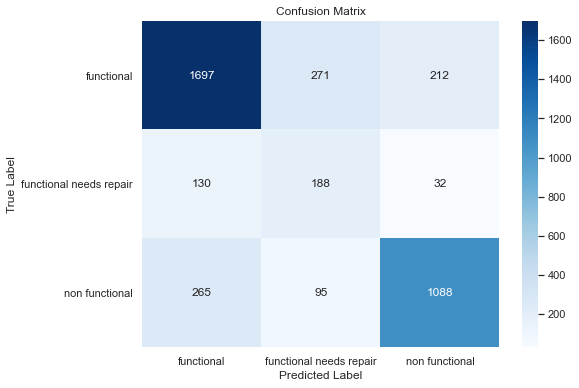

In [182]:
#1. Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_smote)

# 2. Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# 3. (Optional) Visualize the Confusion Matrix for better readability
# Get the unique class labels from the test data to label the axes
labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Overall Insights and Conclusion
Strong Performance on Extreme Classes: The model does a very good job of correctly identifying the "functional" (1697/2180) and "non-functional" (1088/1448)  pumps. The diagonal values for these classes are the highest in their respective rows.

Weak Performance on the "Needs Repair" Class: The model struggles significantly with the "needs repair" class. It only correctly identifies 188 of the 350 pumps in this category (188 + 130 + 32). It frequently confuses them with the "functional" class (130 instances), which is a major problem for a predictive model designed to guide repair effort.

## 6. Conclusion

The project successfully built a machine learning model to predict the functional status of water pumps in Tanzania. The final model, an optimized XGBoost Classifier, provides a more reliable and realistic measure of its expected performance on new, unseen data. This tuned model is the one recommended for deployment, as it is more robust and better aligned with the ultimate goal of accurate and dependable prediction in practical applications.


## 7. Recommendation  

To significantly improve the predictive accuracy of the model, especially for the "functional needs repair" class, future data collection efforts should focus on enriching the dataset with additional, more detailed features. Incorporating details such as:

The last service date of the well.

The types of repairs that were performed.

A list of specific parts that were replaced or repaired.

These would provide invaluable information for more robust model predictions.